<img src="https://user.oc-static.com/upload/2020/11/25/16063163322759_Screen%20Shot%202020-11-05%20at%2011.15.15.png" alt=""></a>

   # <font color='indianred'>Détectez des faux billets avec Python</font>

  ## <font color='indianred'> Sommaire<font></a>
    

## <font color='indianred'>Présentation du projet<font></a> 
    
- <a href="#C1"> 1.Rappel du contexte</a>
- <a href="#C2"> 2.objectifs</a>
- <a href="#C3"> 3.Démarche à suivre</a>

    
## <font color='indianred'>Partie 1 : Import et Inspection des données<font></a>

- <a href="#C4"> 1. Importation  des librairies et chargement des données</a> 
    
- <a href="#C5"> 2. Fonctions utiles </a> 
    
- <a href="#C6"> 3. Analyse exploratoire </a>
  - <a href="#C7"> 3.1 Lien entre les variables </a>
  - <a href="#C8"> 3.2 Corrélation entre les variables</a>
  - <a href="#C9"> 3.3 Encodage des Variables Categorielles</a>
    
- <a href="#C10"> 4.Imputation des valeurs manquantes</a>
  - <a href="#C11"> 4.1 Regression linéaire multiple</a>
  - <a href="#C12"> 4.2 Evaluation du modèle de regression linéaire multiple("Analyse des résidus")</a>
    - <a href="#C13"> 4.2.1 Hypothèse de multicolinéarité</a>
    - <a href="#C14"> 4.2.2 Hypothèse de l'homoscédasticité des résidus</a>
    - <a href="#C15"> 4.2.3 Hypothèse de la normalité des résidus</a>
    - <a href="#C16"> 4.2.4 Test de Shapiro-Wilk</a>
    - <a href="#C17"> 4.2.5 Conclusion des vérifications des hypothèses de la régression linéaire:</a>
    - <a href="#C18"> 4.2.6 Mise en place de la régression lineaire</a>
    - <a href="#C19"> 4.2.7 Vérifions la cohérence des résultats obtenus</a>
    
## <font color='indianred'>Partie2 : Modélisations<font></a> 
       
- <a href="#C20"> 1. ACP</a>
  - <a href="#C21"> 1.1 Préparation des données pour l'ACP</a>
  - <a href="#C22"> 1.2 Calcul des composantes principales</a>
  - <a href="#C23"> 1.3 Création de l'éboulis des valeurs propres</a>
  - <a href="#C24"> 1.4 Cercle des corrélations</a>
  - <a href="#C25"> 1.5 Projection des individus sur le plan factoriel selon le type de billet</a>
    
- <a href="#C26"> 2. Méthode des K-Means (clustering non supervisé)</a>
  - <a href="#C27"> 2.1 Préparation des données</a>
  - <a href="#C28"> 2.2 Evaluation du modèle</a>
    
- <a href="#C29"> 3. Régression logistique (classification supervisé)</a> 
  - <a href="#C30"> 3.1 Préparation des données</a> 
  - <a href="#C31"> 3.2 Création du modèle de régression logistique</a>
  - <a href="#C32"> 3.3 Prédictions</a>
  - <a href="#C33"> 3.4 Vérification de la qualité du modèle</a>
  - <a href="#C34"> 3.5 Evaluation du modèle</a>
    
- <a href="#C35"> 4. Méthode du K-NN ( le plus proche voisin)</a>
  - <a href="#C36"> 4.1 Préparation des données</a>
  - <a href="#C37"> 4.2 Choisir le nombre optimal de k</a>
  - <a href="#C38"> 4.3Création du modèle de KNN</a>
  - <a href="#C39"> 4.4 Prédictions</a>
  - <a href="#C40"> 4.5 Vérifications de la qualité du modèle</a>
    
- <a href="#C41">  5. Méthode de Randomforest</a>
  - <a href="#C42"> 5.1 Préparation des données</a>
  - <a href="#C43"> 5.2 Création du modèle de Randomforest</a>
  - <a href="#C44"> 5.3 Prédictions</a>
  - <a href="#C45">5.4 Vérification de la qualité du modèle</a>
  
- <a href="#C46"> 6 . Comparaison des performances des modèles</a>
    
- <a href="#C47"> 7. Fichier à tester</a>

## <font color='indianred'>Présentation du projet</font></a> 

### <a name="C1">1. Rappel du contexte</a>

- **Créer un modèle de détection de faux billets pour l'ONCFM en tant que consultant en analyse de données, et présenter les résultats à la fin de la mission.**

### <a name="C2">2. Mission et objectifs </a>

- **Ma mission en tant que data analyst est de développer un algorithme capable de détecter les faux billets d'euros.**
- **L'objectif est d'assurer une identification précise et automatique des contrefaçons pour l'ONCFM.**

### <a name="C3">3. Démarche à suivre </a>

- **Analyser le jeu de données fourni par l'ONCFM pour construire et valider un modèle prédictif qui détecte les faux billets**
- **Utilisation des methodes d'apprentissage supervisé et non supervisé**
- **Tester l'algorithme choisi sur un jeu de données**
- **Présenter les résultats à la responsable du projet.**

## <font color='indianred'>Partie 1 : Import et Inspection des données</font></a>

### <a name="C4">1. Importation  des librairies et chargement des données</a>

In [855]:
# Importations standards
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Analyse statistique
from scipy.stats import t, shapiro
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Machine Learning : Prétraitement
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split

# Machine Learning : Modèles
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.cluster import KMeans

# Machine Learning : Métriques
from sklearn.metrics import (
    accuracy_score, 
    precision_score, 
    recall_score, 
    confusion_matrix,
    make_scorer
)

# Machine Learning : Validation croisée
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict


import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [856]:
#Import du csv
billets = pd.read_csv('billets.csv', sep=';')

### <a name="C5">2. Fonctions utiles</a>

In [857]:
#Fonction pour détecter valeurs manquantes et les doublons
def decrire_dataframe(df: pd.DataFrame):
    """
    Retourner un dataframe avec des informations sur les colonnes d'un dataframe
    """
    desc = df.columns.to_frame(name="column").set_index('column') #construire le dataframe résultats
    desc['count'] = df.notnull().sum() #count de values non nulls
    desc['unique'] = df.nunique() # nombre de values unique
    desc['dtype'] = df.dtypes # type de données dans chque colonne
    desc['count_null']=df.isna().sum() #count de valeurs nulls
    desc['null%']=round((df.isna().sum()/df.shape[0]*100),2)
    desc['duplicated']=df.duplicated().sum() # nombre de valeurs en doubles
    return desc

#Vérifier l'unicité de la clé primaire
#Creation d'une fonction qui teste l'unicité d'une colonne  

def cle_primaire(df,col):
    if len(df)==len(df[col].unique()):
        print('La variable', col, 'est une clé primaire')
    else: 
        print('La variable',col, 'n\'est pas une clé primaire')
        

def is_zero(cell_value, color='pink'):
    """
    style pour souligné une valeur
    example use:
    df.style.applymap(is_zero,subset=["my_col"],color='red')
    """
    return f'background-color: {color};' if cell_value == 0 else None


In [858]:
def my_backward_selected(data, response):
    """Linear model designed by backward selection.

    Parameters:
    -----------
    data : pandas DataFrame with all possible predictors and response

    response: string, name of response column in data

    Returns:
    --------
    model: an "optimal" fitted statsmodels linear model
           with an intercept
           selected by backward selection
           evaluated by parameters p-value
    """
    remaining = set(data._get_numeric_data().columns)
    if response in remaining:
        remaining.remove(response)
    cond = True

    while remaining and cond:
        formula = "{} ~ {} + 1".format(response,' + '.join(remaining))
        print('_______________________________')
        print(formula)
        model = smf.ols(formula, data).fit()
        score = model.pvalues[1:]
        toRemove = score[score == score.max()]
        if toRemove.values > 0.05:
            print('remove', toRemove.index[0], '(p-value :', round(toRemove.values[0],3), ')')
            remaining.remove(toRemove.index[0])
        else:
            cond = False
            print('is the final model !')
        print('')
    print(model.summary())
    
    return model

In [859]:
def correlation_graph(pca, 
                      x_y, 
                      features) : 
    """Affiche le graphe des correlations

    Positional arguments : 
    -----------------------------------
    pca : sklearn.decomposition.PCA : notre objet PCA qui a été fit
    x_y : list ou tuple : le couple x,y des plans à afficher, exemple [0,1] pour F1, F2
    features : list ou tuple : la liste des features (ie des dimensions) à représenter
    """

    # Extrait x et y 
    x,y=x_y

    # Taille de l'image (en inches)
    fig, ax = plt.subplots(figsize=(10, 9))

    # Pour chaque composante : 
    for i in range(0, pca.components_.shape[1]):

        # Les flèches
        ax.arrow(0,0, 
                pca.components_[x, i],  
                pca.components_[y, i],  
                head_width=0.07,
                head_length=0.07, 
                width=0.02, )

        # Les labels
        plt.text(pca.components_[x, i] + 0.05,
                pca.components_[y, i] + 0.05,
                features[i])
        
    # Affichage des lignes horizontales et verticales
    plt.plot([-1, 1], [0, 0], color='grey', ls='--')
    plt.plot([0, 0], [-1, 1], color='grey', ls='--')

    # Nom des axes, avec le pourcentage d'inertie expliqué
    plt.xlabel('F{} ({}%)'.format(x+1, round(100*pca.explained_variance_ratio_[x],1)))
    plt.ylabel('F{} ({}%)'.format(y+1, round(100*pca.explained_variance_ratio_[y],1)))

    # J'ai copié collé le code sans le lire
    plt.title("Cercle des corrélations (F{} et F{})".format(x+1, y+1))

    # Le cercle 
    an = np.linspace(0, 2 * np.pi, 100)
    plt.plot(np.cos(an), np.sin(an))  # Add a unit circle for scale

    # Axes et display
    plt.axis('equal')
    plt.show(block=False)

In [860]:
# Définition de la fonction pour le graphique Projection des individus sur les plans factoriels
def display_factorial_planes(X_projected, n_comp, pca, axis_ranks, labels=None, alpha=1, illustrative_var=None):
    for d1, d2 in axis_ranks:
        if d2 < n_comp:

            # initialisation de la figure
            fig = plt.figure(figsize=(10, 10))

            # affichage des points
            if illustrative_var is None:
                plt.scatter(X_projected[:, d1],
                            X_projected[:, d2], alpha=alpha)
            else:
                illustrative_var = np.array(illustrative_var)
                for value in np.unique(illustrative_var):
                    selected = np.where(illustrative_var == value)
                    plt.scatter(
                        X_projected[selected, d1], X_projected[selected, d2], alpha=alpha, label=value)
                plt.legend()

            # affichage des labels des points
            if labels is not None:
                for i, (x, y) in enumerate(X_projected[:, [d1, d2]]):
                    plt.text(x, y, labels[i],
                             fontsize='14', ha='center', va='center')

            # détermination des limites du graphique
            boundary = np.max(np.abs(X_projected[:, [d1, d2]])) * 1.1
            plt.xlim([-boundary, boundary])
            plt.ylim([-boundary, boundary])

            # affichage des lignes horizontales et verticales
            plt.plot([-100, 100], [0, 0], color='grey', ls='--')
            plt.plot([0, 0], [-100, 100], color='grey', ls='--')

            # nom des axes, avec le pourcentage d'inertie expliqué
            plt.xlabel('F{} ({}%)'.format(
                d1+1, round(100*pca.explained_variance_ratio_[d1], 1)))
            plt.ylabel('F{} ({}%)'.format(
                d2+1, round(100*pca.explained_variance_ratio_[d2], 1)))

            plt.title(
                "Projection des individus (sur F{} et F{})".format(d1+1, d2+1))
            plt.show(block=False)

### <a name="C6"> 3. Analyse exploratoire </a> 

In [861]:
# Vérification de la taille du dataframe
billets.shape

(1500, 7)

In [862]:
# Résume des donnees brutes:
billets.info()
billets.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   is_genuine    1500 non-null   bool   
 1   diagonal      1500 non-null   float64
 2   height_left   1500 non-null   float64
 3   height_right  1500 non-null   float64
 4   margin_low    1463 non-null   float64
 5   margin_up     1500 non-null   float64
 6   length        1500 non-null   float64
dtypes: bool(1), float64(6)
memory usage: 71.9 KB


,diagonal,height_left,height_right,margin_low,margin_up,length
count,1500.000000,1500.000000,1500.000000,1463.000000,1500.000000,1500.00000
mean,171.958440,104.029533,103.920307,4.485967,3.151473,112.67850
std,0.305195,0.299462,0.325627,0.663813,0.231813,0.87273
min,171.040000,103.140000,102.820000,2.980000,2.270000,109.49000
25%,171.750000,103.820000,103.710000,4.015000,2.990000,112.03000
50%,171.960000,104.040000,103.920000,4.310000,3.140000,112.96000
75%,172.170000,104.230000,104.150000,4.870000,3.310000,113.34000
max,173.010000,104.880000,104.950000,6.900000,3.910000,114.44000


In [863]:
# vérifier les valeurs que prend la colonne is_genuine
billets['is_genuine'].unique()

array([ True, False])

In [864]:
# Vérification des valeurs nulles
print(pd.isnull(billets).sum())

is_genuine       0
diagonal         0
height_left      0
height_right     0
margin_low      37
margin_up        0
length           0
dtype: int64


In [865]:
(decrire_dataframe(billets).reset_index().style
    .bar(axis='index', subset=['count'], color='green')
    .applymap(is_zero, subset=['count', 'unique'], color='pink'))

,column,count,unique,dtype,count_null,null%,duplicated
0,is_genuine,1500,2,bool,0,0.000000,0
1,diagonal,1500,159,float64,0,0.000000,0
2,height_left,1500,155,float64,0,0.000000,0
3,height_right,1500,170,float64,0,0.000000,0
4,margin_low,1463,285,float64,37,2.470000,0
5,margin_up,1500,123,float64,0,0.000000,0
6,length,1500,336,float64,0,0.000000,0


In [866]:
#on s'interesse à la colonne "is_genuine"
#Verifier le nombre de billets vrais et faux
billets['is_genuine'].value_counts()

True     1000
False     500
Name: is_genuine, dtype: int64

**Ces données contiennent les informations de 1500 billets de banque, dont 1000 sont authentiques et 500 sont faux. On y trouve des informations qui vont décrire chaque billet dont :**

- la diagonale du billet : 'diagonal'
- la hauteur gauche du billet : 'height_left'
- la hauteur droite du billet : 'height_right'
- la marge inférieure entre le bord du billet et l'image :'margin_low'
- la marge supérieure entre le bord du billet et l'image :'margin_up'
- la longueur du billet :'length'

**La variable is-genuine indique si le billet est authentique ou non par les indicatifs True ou False.**


            diagonal  height_left  height_right  margin_low  margin_up  length
is_genuine                                                                    
False            500          500           500         492        500     500
True            1000         1000          1000         971       1000    1000


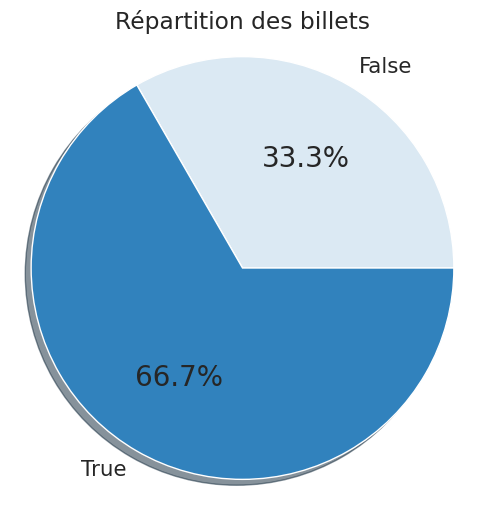

In [867]:
# Vérifions que nous avons bien 1000 vrais billets et 500 faux billets
# Répartition des vrais/faux billets dans notre dataset d'apprentissage:
print(billets.groupby(["is_genuine"]).count())

# Graphique:
fig1, ax1 = plt.subplots()
ax1.pie(billets.groupby(["is_genuine"])["diagonal"].count(),
        labels=["False","True"],
        autopct="%1.1f%%",
        colors=["#dbe9f3","#3182bd"],
        shadow=True)
ax1.axis("equal")
plt.title("Répartition des billets")
plt.show()

True     1000
False     500
Name: is_genuine, dtype: int64



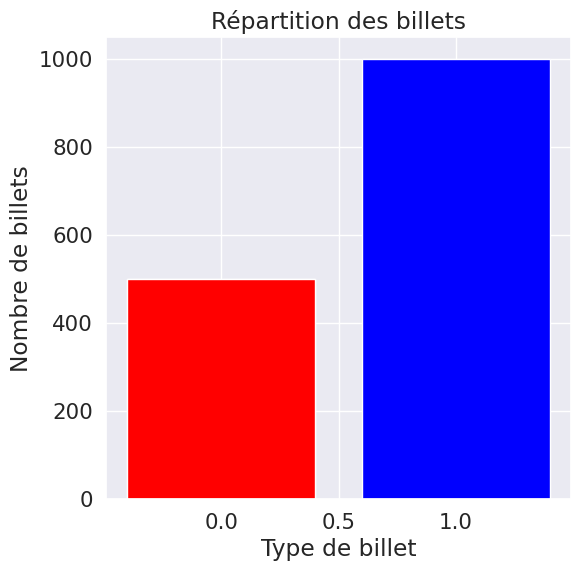

In [868]:
#Nombre de vrais/faux billets :
count = billets['is_genuine'].value_counts()
print(count)
print()

# Créer un graphique à barres avec des couleurs différentes pour les billets faux
plt.bar(count.index, count.values, color=['blue', 'red'])

# Ajouter des étiquettes d'axe et de titre
plt.xlabel('Type de billet')
plt.ylabel('Nombre de billets')
plt.title('Répartition des billets')

# Modifier la couleur de la barre correspondant aux billets faux
plt.bar(count.index[1], count.values[1], color='red')

# Afficher le graphique
plt.show()

#### <a name="C7"> 3.1 Lien entre les variables</a>

- J'identifie la corrélation entre mes différentes variables à l'aide d'un pairplot et d'une matrice de corrélation :

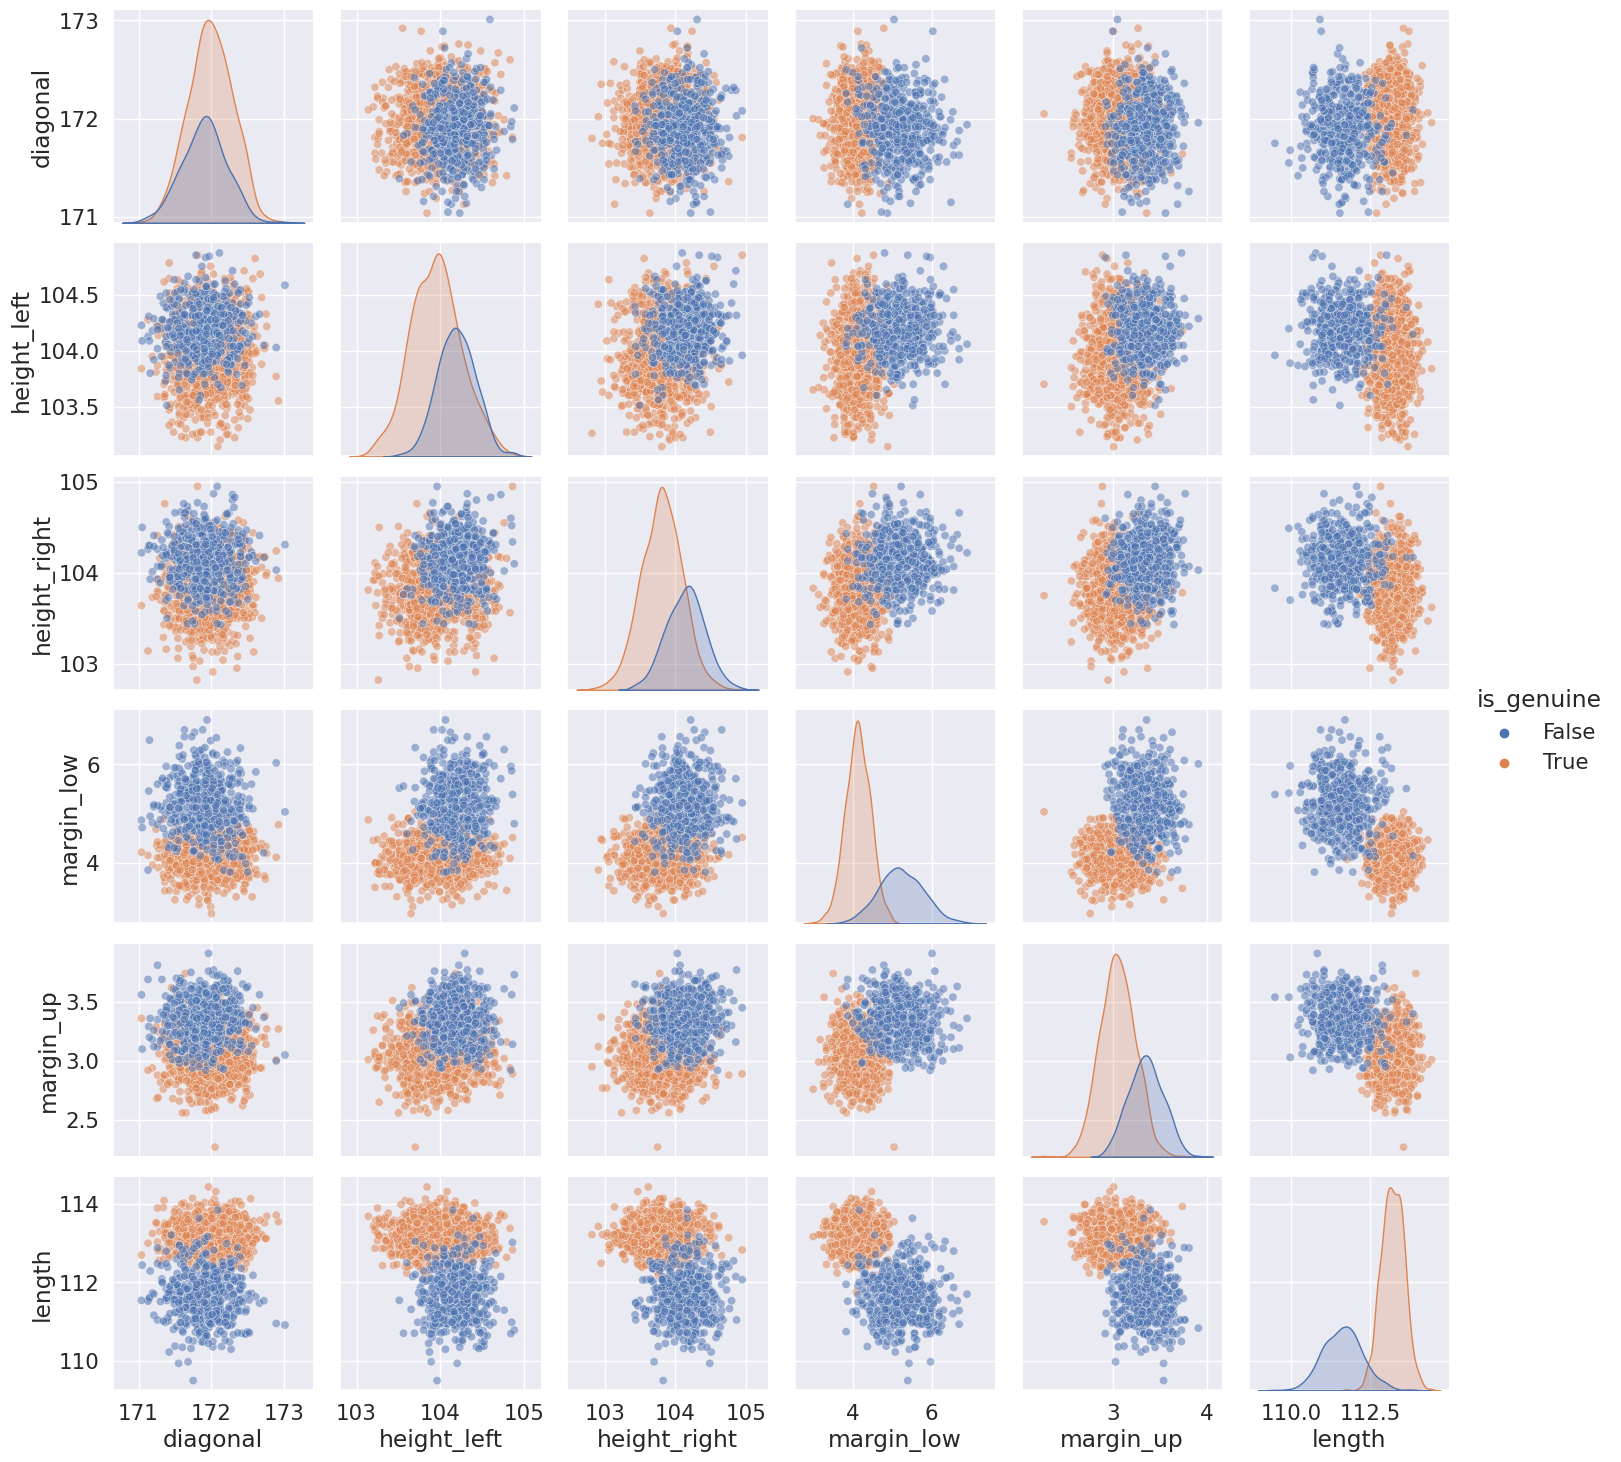

In [869]:
# Pairplot de nos variables selon la validité du billet
sns.pairplot(billets,hue ="is_genuine",plot_kws=dict(alpha=0.5))

#### <a name="C8"> 3.2 Corrélation entre les variables </a>

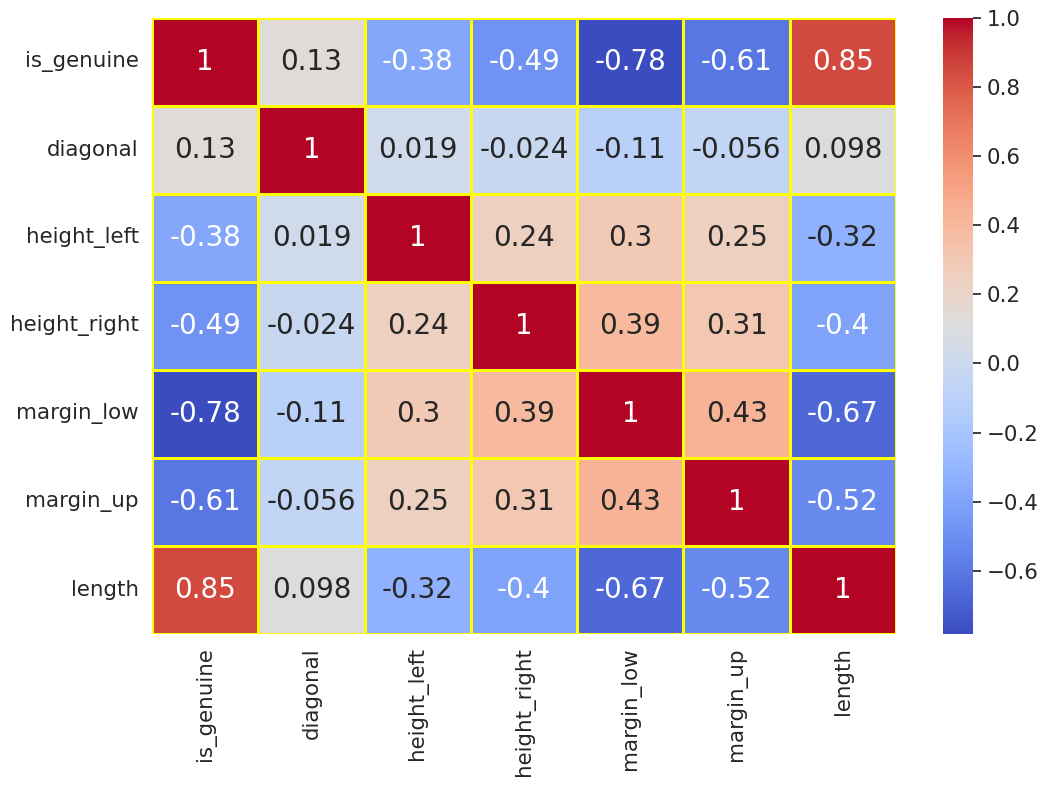

In [870]:
# Pour plus de précision, regardons à l'aide d'une heatmap les corrélations et affichons les coefficients 
# de corrélation entre les variables. 

plt.figure(figsize = (12,8))
sns.heatmap(billets[['is_genuine','diagonal', 'height_left', 'height_right', 'margin_low','margin_up', 'length']].corr(),annot=True, 
            linewidths=2,linecolor='yellow', cmap="coolwarm")
plt.show()

- **"is_genuine" et "length" (0,85) : Ces variables sont fortement corrélées positivement. Si "is_genuine" est vraie, il est probable que la valeur de "length" soit plus élevée.**

- **"margin_low" et "is_genuine" (-0,79) : Ces variables sont fortement corrélées négativement. Si "is_genuine" est vraie, il est probable que la valeur de "margin_low" soit plus basse.**

- **"Margin_low" est bien corrélée négativement avec "is_genuine" et positivement avec"margin_up", "height_right" et "height_left".**

- **La variable la plus corrélée est "lenght" et "is_genuine".**

- **Pour rappel, plus la corrélation est marquée, plus le résultat du coefficient de corrélation tend vers 1 ou -1. Plus il tend vers 0, moins les variables sont corrélées.**

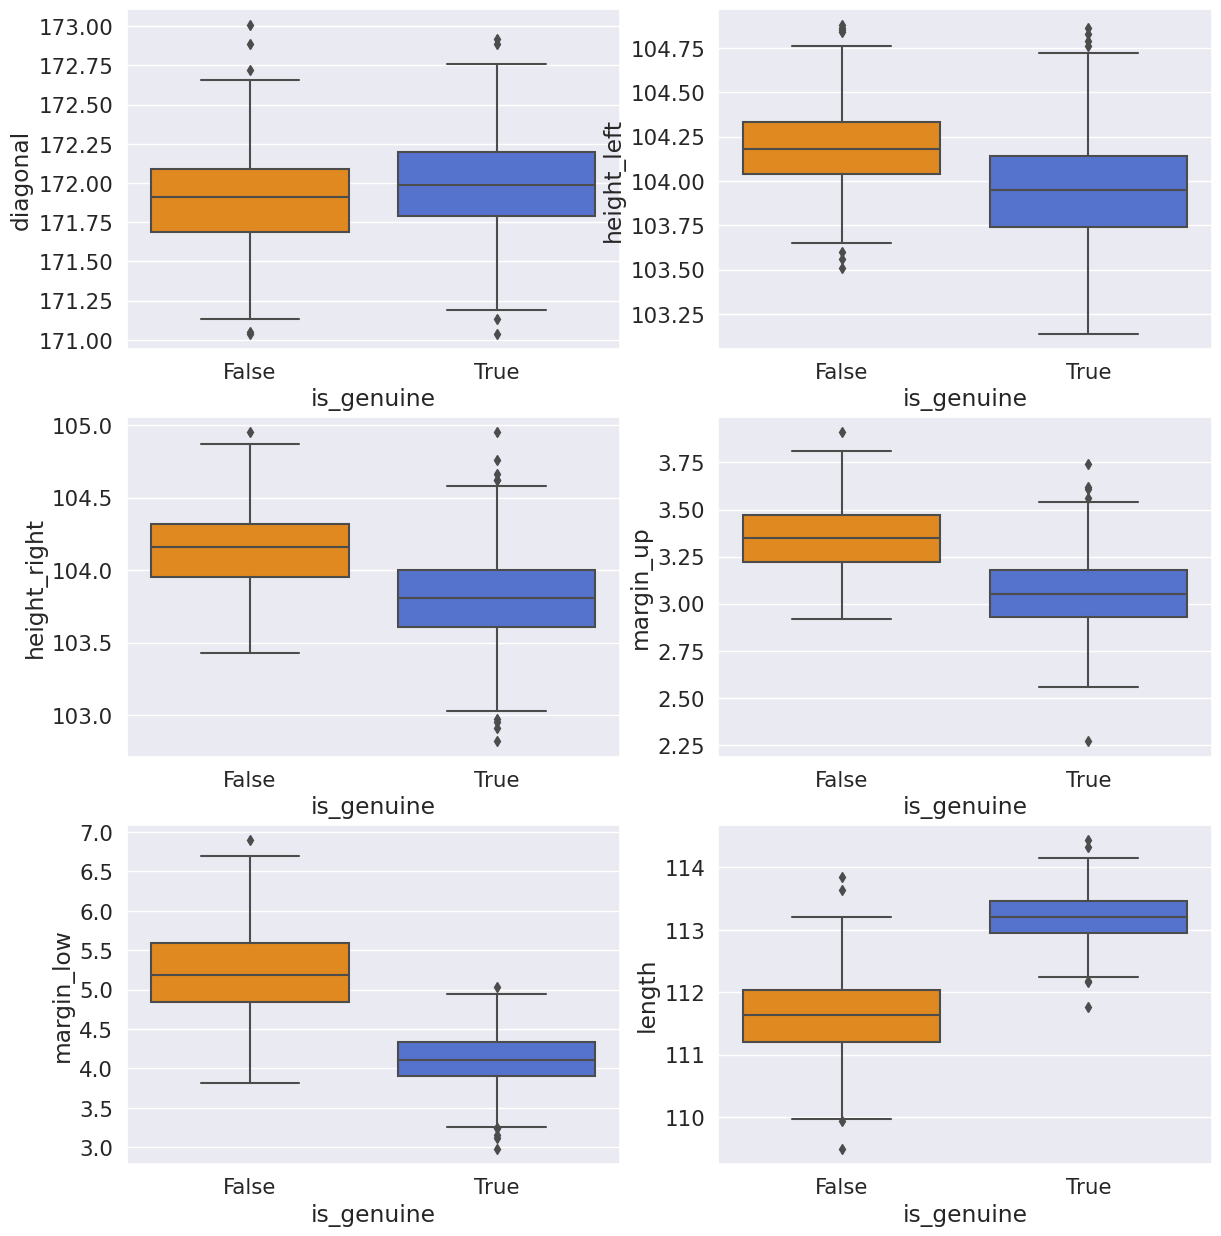

In [871]:
fig, axs = plt.subplots(3, 2, figsize=(14,15))
sns.set_theme(style="ticks", palette="bright")
sns.boxplot(data = billets,x='is_genuine',y='diagonal', ax=axs[0, 0],palette = {False : 'darkorange', True : 'royalblue'})
sns.boxplot(data = billets,x='is_genuine',y='height_left', ax=axs[0, 1], palette = {False : 'darkorange', True : 'royalblue'})
sns.boxplot(data = billets,x='is_genuine',y='height_right', ax=axs[1, 0], palette = {False : 'darkorange', True : 'royalblue'})
sns.boxplot(data = billets,x='is_genuine',y='margin_up', ax=axs[1, 1], palette = {False : 'darkorange', True : 'royalblue'})
sns.boxplot(data = billets,x='is_genuine',y='margin_low', ax=axs[2, 0], palette = {False : 'darkorange', True :'royalblue' })
sns.boxplot(data = billets,x='is_genuine',y='length', ax=axs[2, 1], palette = {False: 'darkorange', True :'royalblue'})
plt.show()

### <a name="C9"> 3.3 Encodage des Variables Catégorielles </a>

In [872]:
# Commençons par changer le bool par du binaire pour la colonne is_genuine
billets["is_genuine"].replace([True, False], [1,0], inplace=True)

### <a name="C10"> 4. Imputation des valeurs manquantes </a>

- **Les 37 valeurs manquantes de 'margin_low' seront imputées par une régression linéaire.**
- **Nous rechercherons les corrélations linéaires entre les variables numériques pour trouver celle la plus corrélée à "margin_low"**

#### <a name="C11"> 4.1 Regression linéaire multiple </a>

##### Compléter les valeurs manquantes

- On a constaté durant l'exploration des données que nous avions des valeurs manquantes dans la colonne "Margin_low". 
- Nous souhaitons pouvoir "prédire" ces données à l'aide d'un model de Machine Learning.
- le modèle de regression linéaire multiple pour imputer les valeurs manquantes de margin_low.
- La régression linéaire multiple est une technique statistique qui permet d'examiner la relation entre une variable dépendante et deux ou plusieurs variables indépendantes (ou explicatives).
- Appliquons la régression linéaire multiple à l'échantillon "billets". Modélisons 'margin_low' en fonction de toutes les autres variables.

In [873]:
billets.info()
billets.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   is_genuine    1500 non-null   int64  
 1   diagonal      1500 non-null   float64
 2   height_left   1500 non-null   float64
 3   height_right  1500 non-null   float64
 4   margin_low    1463 non-null   float64
 5   margin_up     1500 non-null   float64
 6   length        1500 non-null   float64
dtypes: float64(6), int64(1)
memory usage: 82.2 KB


,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
count,1500.000000,1500.000000,1500.000000,1500.000000,1463.000000,1500.000000,1500.00000
mean,0.666667,171.958440,104.029533,103.920307,4.485967,3.151473,112.67850
std,0.471562,0.305195,0.299462,0.325627,0.663813,0.231813,0.87273
min,0.000000,171.040000,103.140000,102.820000,2.980000,2.270000,109.49000
25%,0.000000,171.750000,103.820000,103.710000,4.015000,2.990000,112.03000
50%,1.000000,171.960000,104.040000,103.920000,4.310000,3.140000,112.96000
75%,1.000000,172.170000,104.230000,104.150000,4.870000,3.310000,113.34000
max,1.000000,173.010000,104.880000,104.950000,6.900000,3.910000,114.44000


- **On commence par séparer les individus qui ont une valeur manquante dans "Margin_low". Cela correspond à 37 individus.**

In [874]:
# On crée un Dataset avec les individus qui ont un margin_low = NaN
billets_nan = billets.loc[billets["margin_low"].isna()]

# On créé un nouveau Dataset sans les valeurs manquantes
billets_sans_nan =billets.dropna()
billets_sans_nan.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1463 entries, 0 to 1499
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   is_genuine    1463 non-null   int64  
 1   diagonal      1463 non-null   float64
 2   height_left   1463 non-null   float64
 3   height_right  1463 non-null   float64
 4   margin_low    1463 non-null   float64
 5   margin_up     1463 non-null   float64
 6   length        1463 non-null   float64
dtypes: float64(6), int64(1)
memory usage: 91.4 KB


#####  <font color='blue light'>*Avec Statmodels:"Méthode Backward Regression" 

In [875]:
# On utilise la fonction my_backward_selected afin de trouver les varibles descriptives les plus pertinentes

columns = ['margin_low','diagonal','is_genuine','height_left','height_right','margin_up','length']
reg_backward = my_backward_selected(billets_sans_nan[columns],'margin_low')

_______________________________
margin_low ~ length + height_right + diagonal + is_genuine + height_left + margin_up + 1
remove length (p-value : 0.868 )

_______________________________
margin_low ~ height_right + diagonal + is_genuine + height_left + margin_up + 1
remove diagonal (p-value : 0.719 )

_______________________________
margin_low ~ height_right + is_genuine + height_left + margin_up + 1
remove height_right (p-value : 0.496 )

_______________________________
margin_low ~ is_genuine + height_left + margin_up + 1
remove height_left (p-value : 0.454 )

_______________________________
margin_low ~ is_genuine + margin_up + 1
is the final model !

                            OLS Regression Results                            
Dep. Variable:             margin_low   R-squared:                       0.617
Model:                            OLS   Adj. R-squared:                  0.616
Method:                 Least Squares   F-statistic:                     1174.
Date:                

- **Les variables descriptives intéressantes sont :**
- "is_genuine"
- "margin_up"

- **On peut donc utiliser ce modèle (avec les variables "is_genuine"et"margin_up") à des fins de prévision de la variable 'margin_low' !**
- **Le 𝑅2 vaut environ 0.617, et le 𝑅2 ajusté est d'environ 0.616.**

**Une fois les variables descriptives selectionnées. Nous pouvons définir X et y et réaliser notre régression linéaire :**

In [876]:
# On définit nos valeurs X et y
X = billets_sans_nan.drop(['margin_low','diagonal','height_left','height_right','length'], axis=1)
X = sm.add_constant(X, has_constant='add')
y = billets_sans_nan["margin_low"].values.reshape(len(billets_sans_nan),1)

In [877]:
X

,const,is_genuine,margin_up
0,1.0,1,2.89
1,1.0,1,2.99
2,1.0,1,2.94
3,1.0,1,3.01
4,1.0,1,3.48
...,...,...,...
1495,1.0,0,3.09
1496,1.0,0,3.37
1497,1.0,0,3.36
1498,1.0,0,3.46


#####  <font color='blue light'>*Avec Train_test_split 

##### Fonction de scikit-learn utilisée pour diviser les données en ensembles d'entraînement et de test

In [878]:
# Nous allons maintenant séparer nos données en un groupe d'entrainement et un groupe de test. 
# test_size = le pourcentage de données qui vont dans le test, ici 20%

# On split notre jeu de donnée
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [879]:
print('Nous avons X_train de forme', X_train.shape, 'et y_train de forme', y_train.shape,
      'Nous avons X_test de forme', X_test.shape, 'et y_test de forme', y_test.shape)

Nous avons X_train de forme (1170, 3) et y_train de forme (1170, 1) Nous avons X_test de forme (293, 3) et y_test de forme (293, 1)


In [880]:
# Entraîner notre modèle de régression linéaire sur les données d'entrainement

model_01 = sm.OLS(y_train, X_train)
resultat = model_01.fit()

#Prediction
y_test = resultat.predict(X_test)

print(resultat.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.618
Model:                            OLS   Adj. R-squared:                  0.617
Method:                 Least Squares   F-statistic:                     942.0
Date:                Tue, 14 Nov 2023   Prob (F-statistic):          2.89e-244
Time:                        13:02:55   Log-Likelihood:                -606.17
No. Observations:                1170   AIC:                             1218.
Df Residuals:                    1167   BIC:                             1234.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.6622      0.220     25.769      0.0

- **Le 𝑅2 vaut environ 0.618, et le 𝑅2 ajusté est d'environ 0.617.**

#### <a name="C12"> 4.2  Evaluation du modèle de regression linéaire multiple( "Analyse des résidus") </a>

##### Nous allons maintenant regarder la performance de notre modèle sur les données de train et de test

##### <font color='blue light'>*Vérification des hypothèses

Nous pouvons poursuivre dans l'évaluation avec l'analyse des résidus. L'analyse des résidus a pour objectif de tester la validité d'un modèle de régression. Elle permet de déceler les défaillances d'un modèle. Les résidus correspondent donc à la différence entre les valeurs prédites et les valeurs réelles

Avant de valider l'utilisation de la régression linéaire, nous devons confirmer la validité de plusieurs hypothèses afin de s'assurer que nous pouvons appliquer cette régression. Voici les hypothèses à vérifier :

- **Normalité :** Pour satisfaire cette condition, les erreurs résiduelles de notre modèle devraient idéalement se conformer à une distribution normale, centrée autour de zéro. En d’autres termes, les résidus devraient être distribués normalement avec une moyenne égale à zéro.

- **Homoscédasticité :** L'homoscédasticité signifie que la variance des erreurs résiduelles est constante à tous les niveaux de la variable prédite.Cela implique que la variance des erreurs devrait rester uniforme à tous les niveaux de la variable explicative.
- **Multicolinéarité :** Cette hypothèse concerne la relation entre les variables explicatives dans notre modèle de régression. Elle stipule qu'il ne devrait pas y avoir de forte corrélation linéaire entre les variables indépendantes.

**Ces vérifications sont cruciales pour assurer la robustesse et la fiabilité des résultats fournis par le modèle de régression linéaire.**


##### <a name="C13"><font color='blue light'> 4.2.1 Hypothèse de Multicolinéarité<font></a>

In [881]:
#Vérifier la colinéarité des variables

from statsmodels.stats.outliers_influence import variance_inflation_factor

# On calcule les VIF pour chaque variable explicative
vif = pd.DataFrame()
vif["Variable"] = X_train.columns
vif["VIF"] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]

# On affiche les résultats
print("Variance Inflation Factor (VIF):")
print(vif)

Variance Inflation Factor (VIF):
     Variable         VIF
0       const  341.438603
1  is_genuine    1.617936
2   margin_up    1.617936


- **Le VIF (facteur d'inflation de la variance) utilisé afin d'évaluer la multicolinéarité dans un modèle de régression linéaire.**
- **Les valeurs VIF pour les variables explicatives "is_genuine" et "margin_up" sont toutes deux de 1.62.**
- **Les deux variables sont bien en dessous de 10,ce qui signifie une faible corrélation entre ces variables et les autres variables indépendantes dans le modèle. Cela suggère que ces variables peuvent être conservées dans le modèle pour une analyse plus approfondie.**
- **En général, des valeurs de VIF inférieures à 10 suggèrent une absence de multicolinéarité significative.**

#####  <a name="C14"><font color='blue light'> 4.2.2 Hypothèse de l'homoscédasticité des résidus <font></a>

In [882]:
import statsmodels.api as sm
import statsmodels.stats.diagnostic as smd

# Testez l’homoscédasticité (c'est-à-dire la constance de la variance) des résidus :
_, pval, __, f_pval = smd.het_breuschpagan(resultat.resid, X_train)
print('p value test Breusch Pagan:', pval)

p value test Breusch Pagan: 1.6223530361976033e-27


- **L'homoscédasticité est la constance de la variance des résidus dans un modèle de régression.**
- **Le test de"Breusch Pagan" teste si les résidus sont homoscédastiques, c'est-à-dire si la variance des résidus est constante par rapport aux variables prédictrices.**
- **La valeur de p (pval) nous donne la signification statistique du test. Une valeur de p faible (<0,05) indique une violation de l'homoscédasticité (présence d'hétéroscédasticité).**

- **Dans notre cas le test de "Breusch Pagan" indique une p-valeur  inférieure à 5 %, on rejette l'hypothèse 𝐻0 selon laquelle les variances sont constantes (l'hypothèse d’homoscédasticité).**    
- **Cela indique une violation de l'hypothèse d'homoscédasticité dans notre modèle de régression linéaire.**

- **Cela signifie que la variance des erreurs n'est pas constante, ce qui est un problème pour la régression linéaire, affectant la fiabilité de vos résultats.**

#####   <a name="C15"><font color='blue light'> 4.2.3 Hypothèse de la normalité des résidus<font></a>

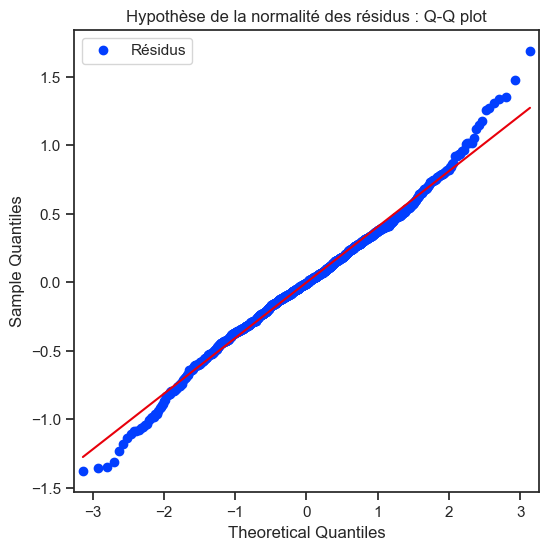

In [886]:
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Calcul des résidus
residuals = resultat.resid

# Premier graphique QQ plot
sm.qqplot(residuals, line='s', label="Résidus")
plt.title("Hypothèse de la normalité des résidus : Q-Q plot")
plt.legend()
plt.show()

- **Les points du diagramme Quantile-Quantile des résidus suivent étroitement la diagonale à 45°, ce qui suggère une distribution normale de ces derniers, bien qu'il y ait quelques déviations, notamment dans les queues.**

#####  <a name="C16"><font color='blue light'> 4.2.4 Test de Shapiro-Wilk <font></a>

In [887]:
#Testez la normalité des résidus

from scipy.stats import shapiro

statistic, p_value = shapiro(residuals)

if p_value > 0.05:
    print("Les résidus semblent suivre une distribution normale (hypothèse non rejetée).")
    print("P-value :",p_value)
else:
    print("Les résidus ne suivent pas une distribution normale (hypothèse rejetée).")
    print("P-value :",p_value)

Les résidus ne suivent pas une distribution normale (hypothèse rejetée).
P-value : 7.613264642714057e-06


- **Ici, l'hypothèse de normalité est remise en cause (p-value = 6.2e-06 < 0.05).**

- **Néanmoins, l'observation des résidus, le fait qu'ils ne soient pas très différents d'une distribution symétrique permet de dire que les résultats obtenus par le modèle linéaire gaussien ne sont pas absurdes, même si le résidu n'est pas considéré comme étant gaussien.**

In [888]:
residuals = resultat.resid

In [889]:
# Test normalité des résidus avec Shapiro
shapiro(resultat.resid)

ShapiroResult(statistic=0.992205023765564, pvalue=7.613264642714057e-06)

##### L'hypothèse de normalité est remise en cause, pvalue < 5%

<AxesSubplot:ylabel='Count'>

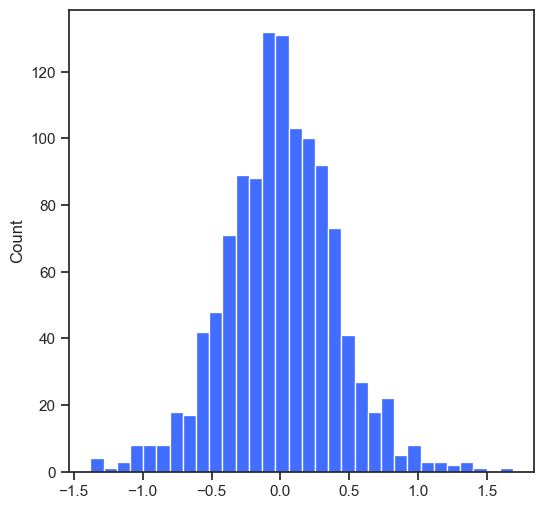

In [890]:
# Representation graphique de notre régression linéaire
sns.histplot(resultat.resid)

##### Néanmoins, l'observation des résidus, le fait qu'ils ne soient pas très différents d'une distribution symétrique, et le fait que l'échantillon soit de taille suffisante (supérieure à 30) permettent de dire que les résultats obtenus par le modèle gaussien ne sont pas absurdes, même si le résidu n'est pas considéré comme étant gaussien

##### <a name="C17"><font color='blue light'> 4.2.5 Conclusion des vérification des hypothèses de la régression linéaire :<font></a>

   - **Normalité des résidus : NON VERIFIÉ**
   - **Homoscédasticité : NON VERIFIÉ**
   - **Multicolinéarité : VERIFIÉ**

- **En résumé, bien que la Multicolinéarité soit vérifiée, les violations de la normalité et de l'homoscédasticité des résidus peuvent remettre en question l'utilisation directe de la régression linéaire.**

#####  <a name="C18"><font color='blue light'> 4.2.6 Mise en place de la régression lineaire <font></a>

In [891]:
# On définit nos valeurs X et y
X =billets_nan.drop(["margin_low","height_right","length","diagonal","height_left"], axis=1)
X = sm.add_constant(X)
y =billets_nan["margin_low"].values.reshape(len(billets_nan),1)

In [892]:
# Je réalise la prédiction à l'aide du model créé avec StatModel
prediction = resultat.predict(X)

##### Nos données sont organisées dans un tableau, nous pouvons maintenant les attribuer à notre table "billets_nan".

In [893]:
# On assigne les données prédites à notre dataframe avec les valeurs manquantes
new_df= billets_nan.assign(margin_low=prediction)
new_df.head()

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
72,1,171.94,103.89,103.45,4.090322,3.25,112.79
99,1,171.93,104.07,104.18,4.105030,3.14,113.08
151,1,172.07,103.80,104.38,4.121075,3.02,112.93
197,1,171.45,103.66,103.80,4.040850,3.62,113.27
241,1,171.83,104.14,104.06,4.121075,3.02,112.36


In [894]:
# On ajoute les nouvelles données aux données de base
billets= billets_sans_nan.append(new_df)

#####   <a name="C19"><font color='blue light'> 4.2.7 Vérifions la cohérence des résultats obtenus <font></a>

In [895]:
print("Avec la prédiction du modèlede Régression Linéaire")
display(billets[["margin_low"]].describe())
print("Sans la prédiction du modèle de Régression Linéaire")
display(billets_sans_nan[["margin_low"]].describe())

Avec la prédiction du modèlede Régression Linéaire


,margin_low
count,1500.000000
mean,4.482809
std,0.659780
min,2.980000
25%,4.030000
50%,4.310000
75%,4.870000
max,6.900000


Sans la prédiction du modèle de Régression Linéaire


,margin_low
count,1463.000000
mean,4.485967
std,0.663813
min,2.980000
25%,4.015000
50%,4.310000
75%,4.870000
max,6.900000


##### Nous n'avons plus de valeurs manquante dans le dataset, nous pouvons poursuivre l'analyse

## <font color='indianred'>Partie 2 : Modélisations </font></a>

##### Nous allons tester différentes méthodes de classification dont l'objectif va être de déterminer si de nouveaux billets sont vrais ou faux.

## Tester les 4 modèles (K-means,K-NN,Régression Logistique et Random Forest )

### <a name="C20"> 1. ACP </a> 

- **Je commence par réaliser une Analyse en Composantes Principales (ACP) pour décrypter le jeu de données et saisir comment les différentes variables contribuent à la variabilité des données ainsi qu'à la distinction entre un billet vrai et un billet faux.**
- **Objectif:réduire les 6 variables et représenter nos billets dans un espace à 2 dimensions.**

#### <a name="C21"> 1.1 Préparation des données pour l'ACP </a>
- **Je prépare les données en retirant les variables qualitatives et en stockant les valeurs, index et noms des features dans des variables séparées**

In [896]:
#Suppression de is_genuine (qualitative)
X = billets.drop(columns= ['is_genuine'])
X.head()

,diagonal,height_left,height_right,margin_low,margin_up,length
0,171.81,104.86,104.95,4.52,2.89,112.83
1,171.46,103.36,103.66,3.77,2.99,113.09
2,172.69,104.48,103.50,4.40,2.94,113.16
3,171.36,103.91,103.94,3.62,3.01,113.51
4,171.73,104.28,103.46,4.04,3.48,112.54


In [897]:
# Centrage et Réduction
#Je standardise mes données X

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled

array([[-0.48653957,  2.77412327,  3.16324041,  0.05638836, -1.128325  ,
         0.17365114],
       [-1.63372936, -2.23653528, -0.79966777, -1.08073391, -0.69679916,
         0.47166629],
       [ 2.3978233 ,  1.50475644, -1.29119126, -0.1255512 , -0.91256208,
         0.55190114],
       ...,
       [-0.78153123,  1.43794766,  0.61346228,  1.0563138 ,  1.97866106,
        -2.71480344],
       [ 2.29949275,  1.00369058,  1.50434862,  1.06645008,  1.76289814,
        -1.38519737],
       [-0.19154792,  0.83666863,  1.135706  ,  1.13132225,  0.38201544,
        -1.36227312]])

In [898]:
df_centred = pd.DataFrame(X_scaled, columns=X.columns)
df_centred.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   diagonal      1500 non-null   float64
 1   height_left   1500 non-null   float64
 2   height_right  1500 non-null   float64
 3   margin_low    1500 non-null   float64
 4   margin_up     1500 non-null   float64
 5   length        1500 non-null   float64
dtypes: float64(6)
memory usage: 70.4 KB


#### <a name="C22"> 1.2 Calcul des composantes principales </a>

In [899]:
# Nombre de composantes souhaitées
n_comp = 6

# Calcul des composantes principales
pca = PCA(n_components=n_comp)#J'instancie l'ACP pour composantes
pca.fit(X_scaled)#Je fit

PCA(n_components=6)

In [900]:
#On affiche le pourcentage de variance captée par chacune des composantes
# Mettre à jour la variable p pour correspondre au nombre de composantes principales
p = len(pca.explained_variance_)

# Créer le DataFrame scree
scree = pd.DataFrame(
    {
        "Dimension" : ["Dim" + str(x + 1) for x in range(p)],
        "Variance expliquée" : pca.explained_variance_,
        "% variance expliquée" : np.round(pca.explained_variance_ratio_ * 100),#on définit le % dinertie pour chaque rang
        "% cum. var. expliquée" : np.round(np.cumsum(pca.explained_variance_ratio_) * 100)#On calcule la somme cumulée
                                                                                          #du % d'inertie
    }
)
scree

,Dimension,Variance expliquée,% variance expliquée,% cum. var. expliquée
0,Dim1,2.594388,43.0,43.0
1,Dim2,1.018097,17.0,60.0
2,Dim3,0.781761,13.0,73.0
3,Dim4,0.710022,12.0,85.0
4,Dim5,0.579918,10.0,95.0
5,Dim6,0.319816,5.0,100.0


- **Je m'intéresse aux premières composantes :Les 4 premières composantes permettent d'expliquer plus de 85% de la variance.**

#### <a name="C23"> 1.3 Création de l'éboulis des valeurs propres </a>

In [901]:
def display_scree_plot(pca):
    scree = pca.explained_variance_ratio_*100
    # critère de Kaiser
    p = len(X.columns)
    kaiser = 100 / p
        
    plt.figure(figsize=(15, 10))
    plt.bar(np.arange(len(scree))+1, scree)
    plt.plot(np.arange(len(scree))+1, scree.cumsum(), c="red", marker='o')
    plt.axhline(y=kaiser, color='red', linestyle='--')
    plt.xticks(np.arange(len(scree))+1)
    plt.xlabel("rang de l'axe d'inertie")
    plt.ylabel("pourcentage d'inertie")
    plt.title("Eboulis des valeurs propres", fontsize=16, fontweight='bold')
    plt.show(block=False)
    scree_cum = (pca.explained_variance_ratio_*100).cumsum()
    scree_cum = pd.DataFrame(data=scree_cum, index=np.arange(len(scree))+1, columns=['Cumul de variance expliquée']).T
    print(scree_cum)


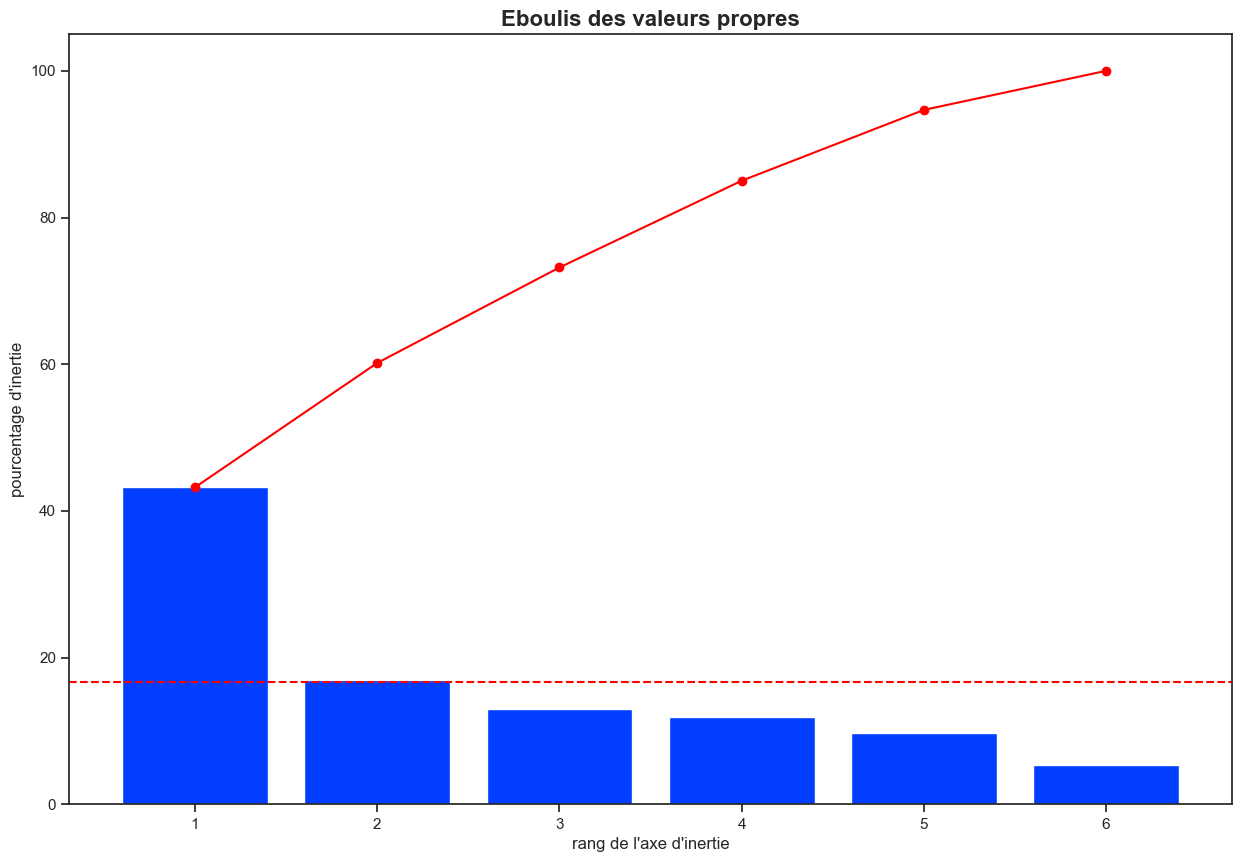

                                     1          2          3          4  \
Cumul de variance expliquée  43.210967  60.167944  73.188609  85.014429   

                                     5      6  
Cumul de variance expliquée  94.673279  100.0  


In [902]:
display_scree_plot(pca)

Etant donnée que nous avons 6 variables, le seuil a prendre en considération est de 16.7% (kaiser=100/6). Nous analyserons donc seulement les variables F1 et F2 qui réprésentent 60,2% de l'inertie totale.

Les 4 autres variables représentent chacune moins de 15% de l'inertie totale, soit moins que notre seuil.


<AxesSubplot:>

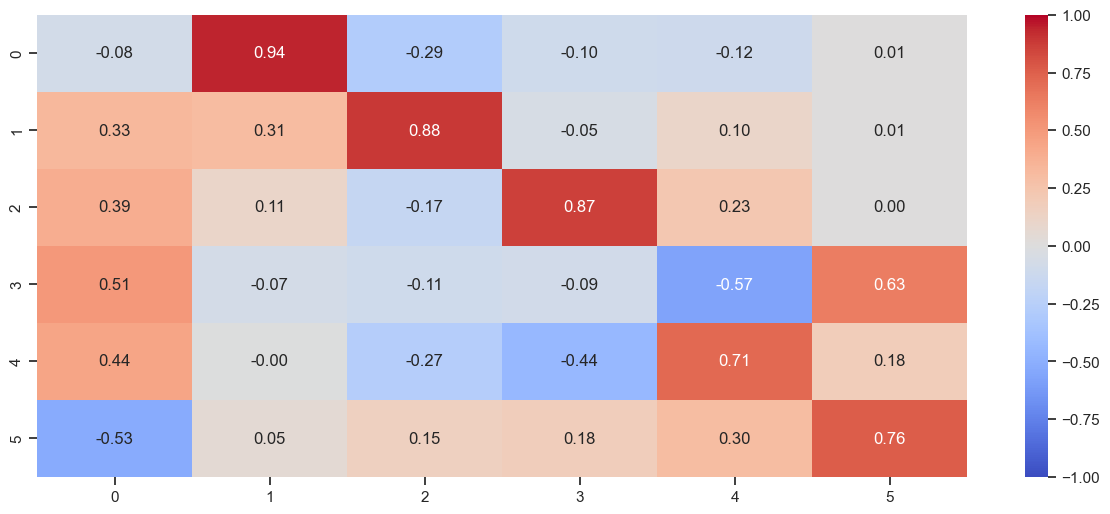

In [903]:
pcs = pca.components_
fig, ax = plt.subplots(figsize=(15, 6))
sns.heatmap(pcs.T, vmin=-1, vmax=1, annot=True, cmap="coolwarm", fmt="0.2f")

##### Je choisis 2 composantes principales, car les 2 premières dimensions représentent 60% des informations importantes.On va s'intéresser aux axes F1 et F2.

#### <a name="C24"> 1.4 Cercle des corrélations </a>

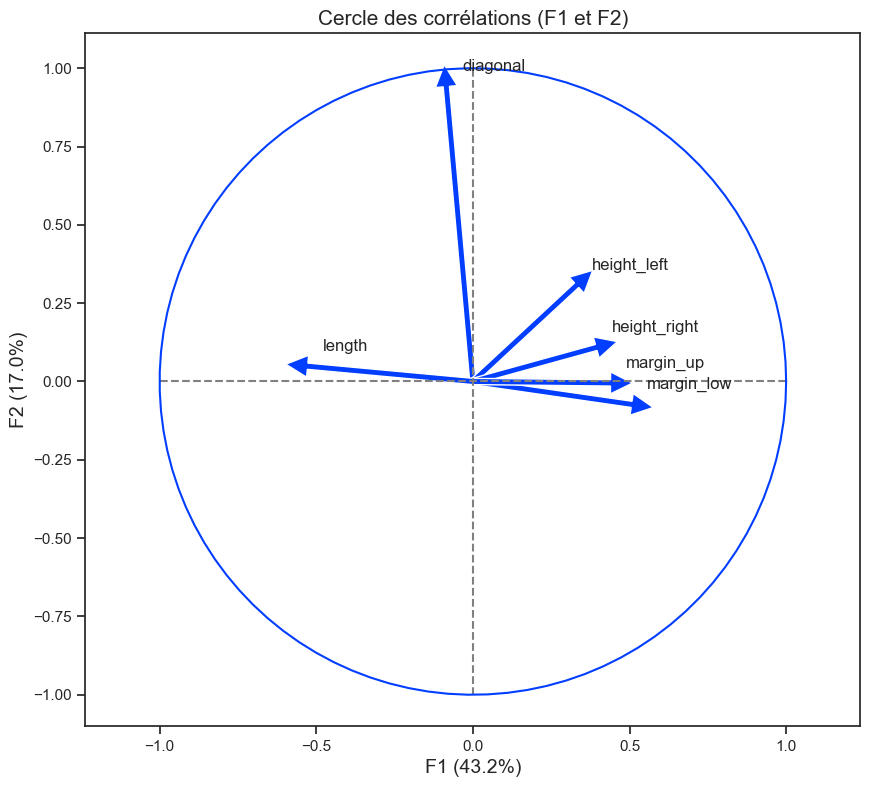

In [904]:
#Graphe de corrélation entre pc1 et pc2
fig, ax = plt.subplots(figsize=(10, 9))
for i in range(0, pcs.shape[1]):
    ax.arrow(0,
             0,  # La flèche commence à l'origine
             pcs[0, i],  #0 for PC1
             pcs[1, i],  #1 for PC2
             head_width=0.07,
             head_length=0.07, 
             width=0.02,              )
    
# On affiche le nom des variables
    plt.text(pcs[0, i] + 0.05,
             pcs[1, i] + 0.05,
             billets.columns[i+1])
    
# affichage des lignes horizontales et verticales
plt.plot([-1, 1], [0, 0], color='grey', ls='--')
plt.plot([0, 0], [-1, 1], color='grey', ls='--')


# nom des axes, avec le pourcentage d'inertie expliqué
plt.xlabel('F{} ({}%)'.format(1, round(100*pca.explained_variance_ratio_[0],1)), fontsize=14)
plt.ylabel('F{} ({}%)'.format(2, round(100*pca.explained_variance_ratio_[1],1)), fontsize=14)

plt.title("Cercle des corrélations (F1 et F2)", fontsize=15)

# On ajoute le cercle unitaire
an = np.linspace(0, 2 * np.pi, 100)
plt.plot(np.cos(an), np.sin(an)) 
plt.axis('equal')
plt.show(block=False)

- **Avec le cercle des corrélations F1-F2 (la projection de la flèche sur F1 correspond au coefficient de corrélation ), on peut trouver des variables qui sont bien corrélées aux composantes principales:**

     - Les variables les plus corrélées positivement à F1 sont 'height' et 'margin'
     - Les variables les plus corrélées négativement à F1 est 'length'
     - Les variables les plus corrélées positivement à F2 est 'diagonal'
- **La matrice ainsi que le cercle des corrélations indiquent que les variables les plus liées à la première composante sont length, margin_low, et aussi margin_up, height_right et height_left. En revanche, la variable diagonal ne semble pas avoir de relation significative.**

- **Passons maintenant à l'observation de la projection de nos billets sur les axes principaux de l'ACP.**

#### <a name="C25"> 1.5 Projection des individus sur le plan factoriel selon le type de billet </a>

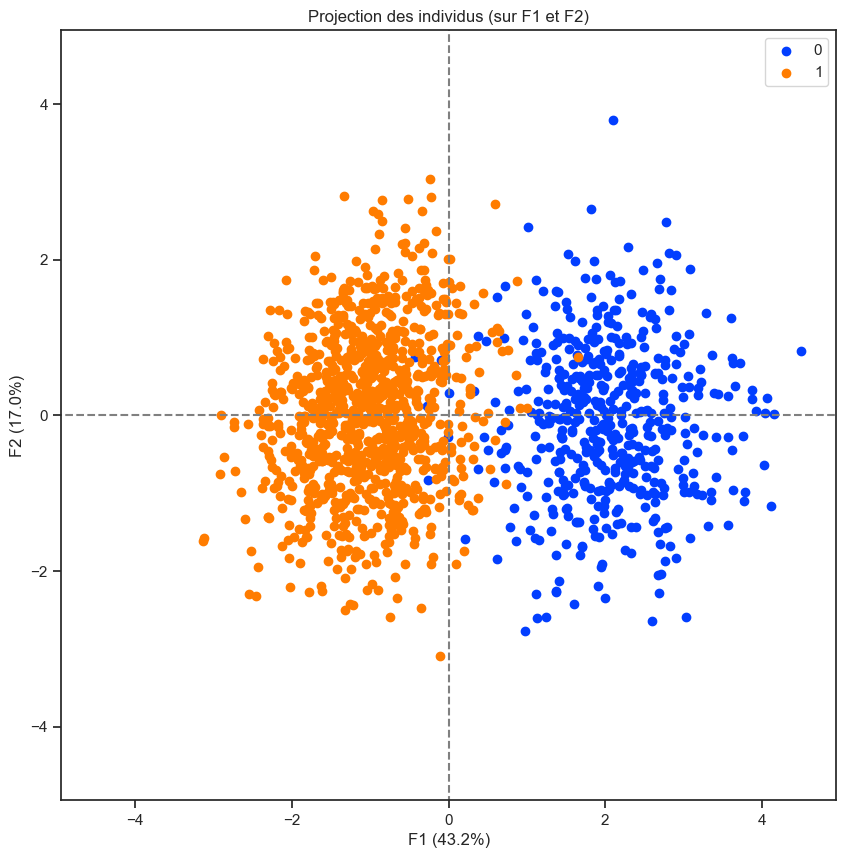

In [905]:
# Projection des individus sur F1 et F2 

X_projected = pca.transform(X_scaled)
display_factorial_planes(X_projected, n_comp, pca, [(0, 1)], illustrative_var = billets.is_genuine)

plt.show()

##### Nous avions observé précédemment que la variable diagonal n'était pas significativement associée à la première composante, mais qu'elle l'était davantage à la deuxième. Cependant, il est apparent que c'est uniquement la première composante qui permet une séparation efficace entre les vrais et les faux billets.

### <a name="C26"> 2. Méthode des K-Means (clustering non-supervisé) </a> 

- **L’algorithme du kmeans est un algorithme itératif qui minimise la somme des distances entre chaque individu et le centroïde du cluster ; c’est la variabilité intra cluster.**
- **Attribuer un cluster à chaque objet (ou sujet, ou point), de façon aléatoire.**

#### <a name="C27"> 2.1 Préparation des données </a>

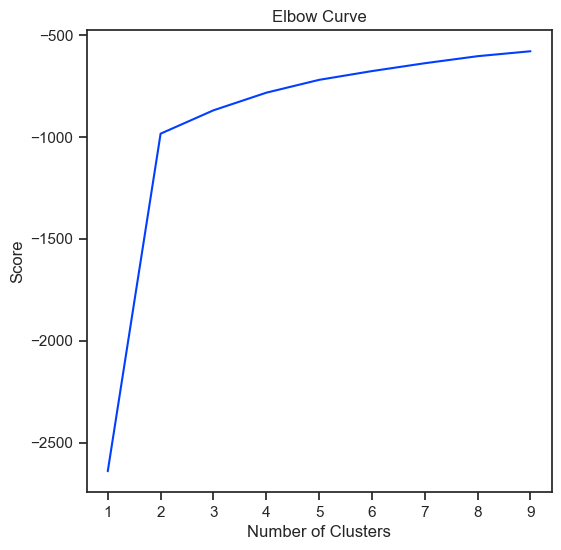

In [906]:
#Méthode des coudes pour connaitre le nombre des clusters
num_clusters = 10
kmeans_tests = [KMeans(n_clusters=i, init='random', n_init=10) for i in range(1, num_clusters)] 
score = [kmeans_tests[i].fit(billets).score(billets) for i in range(len(kmeans_tests))]

# Plot the curve
plt.plot(range(1, num_clusters),score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

- **Nous voyons bien une cassure nette à 2 , il y a donc 2 clusters et k=2**

In [907]:
# Nombre de clusters souhaités
n_clusters = 2

In [908]:
# Code pour standardiser vos caractéristiques et préparer les données (hypothétique)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(billets.drop(['is_genuine'], axis=1))

In [909]:
# Initialisation du modèle KMeans avec le nombre de clusters souhaité
kmeans = KMeans(n_clusters=n_clusters, init='random', n_init=10)

In [910]:
# Ajustement du modèle KMeans sur les données standardisées
kmeans.fit(X_scaled)

KMeans(init='random', n_clusters=2)

In [911]:
# Copie du DataFrame original pour ne pas modifier les données initiales
kmeans_model = billets.copy()

In [912]:
# Récupération des clusters attribués à chaque individu et des centroïdes de clusters
kmeans_model['cluster'] = kmeans.labels_

# Affichage des premières lignes du DataFrame avec les clusters attribués
kmeans_model .head()

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length,cluster
0,1,171.81,104.86,104.95,4.52,2.89,112.83,0
1,1,171.46,103.36,103.66,3.77,2.99,113.09,1
2,1,172.69,104.48,103.50,4.40,2.94,113.16,1
3,1,171.36,103.91,103.94,3.62,3.01,113.51,1
4,1,171.73,104.28,103.46,4.04,3.48,112.54,1


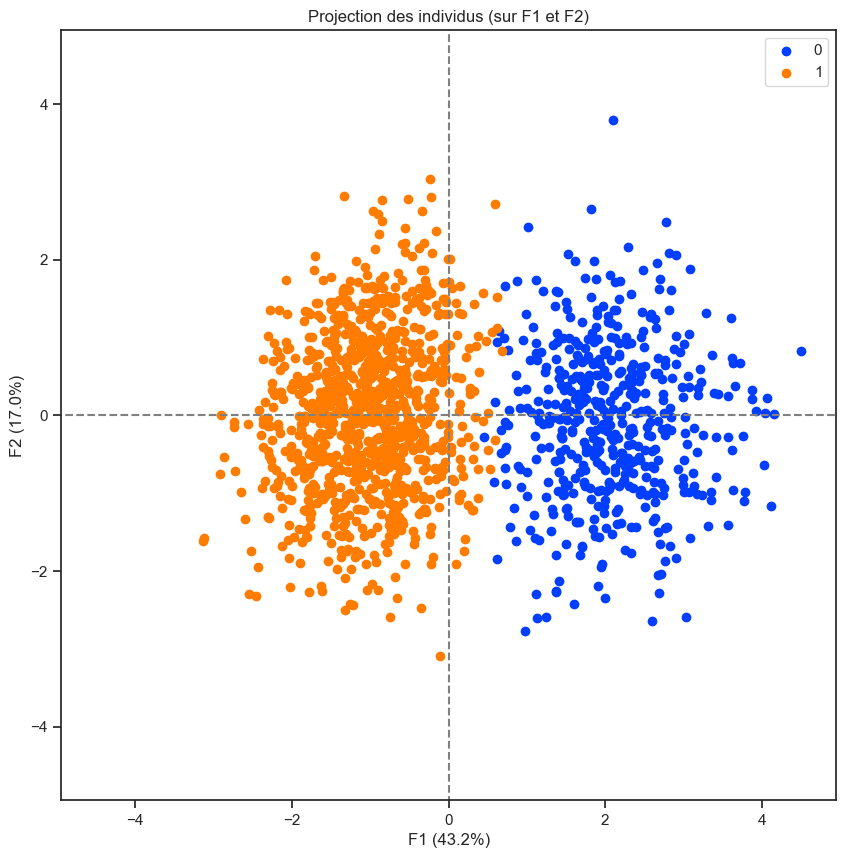

In [913]:
#Projection des individus sur le plan factoriel F1 et F2 par cluster
display_factorial_planes(X_projected, n_comp, pca, [(0, 1)], illustrative_var=kmeans_model.cluster)

In [914]:
# Prédiction des clusters
y_vrai= kmeans_model .is_genuine
y_pred= kmeans.labels_

#### <a name="C28"> 2.2 Evaluation du modèle </a>

#####  <font color='blue light'> 2.2.1 Matrice de confusion K- means

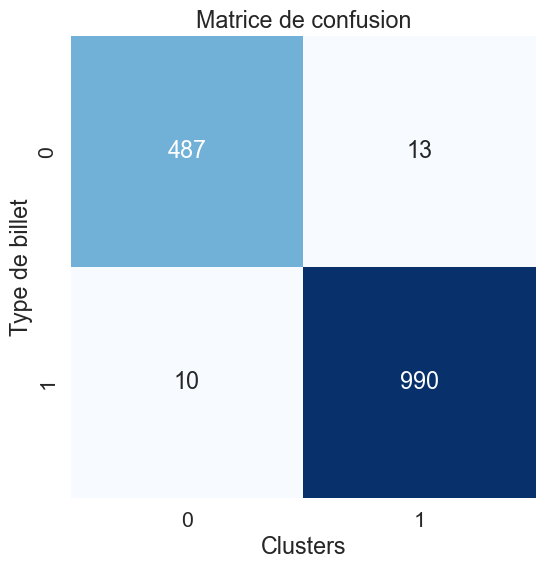

In [915]:
conf_matrix = pd.crosstab(y_vrai, y_pred )

# Representation graphique de notre matrice de confusion
sns.set(rc={'figure.figsize': (6, 6)}, font_scale=1.4)
sns.heatmap(conf_matrix, annot = True, fmt='', cmap='Blues', cbar=False)

plt.title('Matrice de confusion')
plt.xlabel('Clusters')
plt.ylabel('Type de billet')
plt.show()

- Vrais positifs : 990
- vrai négatifs : 486
- Faux négatifs :10
- Faux positifs :14

- Donc nous avons 10 vrais billets détectés comme des faux billets (cluster 0), et 14 faux billets détectés comme des vrais billets (cluster 1).

#####  <font color='blue light'> 2.2.2 Classification report

In [916]:
from sklearn.metrics import classification_report
print(classification_report(y_vrai,y_pred, ))

              precision    recall  f1-score   support

           0       0.98      0.97      0.98       500
           1       0.99      0.99      0.99      1000

    accuracy                           0.98      1500
   macro avg       0.98      0.98      0.98      1500
weighted avg       0.98      0.98      0.98      1500



##### Notre modèle présente une performance  de 98% (taux de prédiction correcte sur toutes les données de test)

- **Evaluation du modèle avec les scores**

#####  <font color='blue light'> 2.2.3 Accuracy/Precision/Recall

In [917]:
# Calculons nos scores de performance :
    
kmeans_accuracy = accuracy_score(y_vrai,y_pred).round(4)
print("Accuracy :",kmeans_accuracy)

kmeans_precision = precision_score(y_vrai,y_pred).round(4)
print("Precision :",kmeans_precision)

kmeans_recall = recall_score(y_vrai,y_pred).round(4)
print("Recall :",kmeans_recall)


Accuracy : 0.9847
Precision : 0.987
Recall : 0.99


- **Exactitude(Accuracy): mesure la globalité des prédictions correctes.** 
- **La précision(Precision): se concentre sur la qualité des prédictions positives**
- **Le rappel(Recall): se concentre sur la capacité du modèle à trouver tous les exemples positifs**
- **Notre modèle présente une performance  de 98% (taux de prédiction correcte sur toutes les données de test)**
- **Une précision de 98% pour le modèle de K-means est généralement considérée comme très élevée, ce qui suggère que le modèle a réussi à bien classifier les données dans les clusters appropriés**


### <a name="C29"> 3. Régression logistique (classification supervisé) </a> 

- **L'objectif de la régression logistique est de modéliser, de classifier, une variable binaire prenant ses valeurs dans {0,1} en fonction de variables explicatives quantitatives (et potentiellement qualitatives).**

#### <a name="C30"> 3.1 Préparation des données </a>

In [918]:
billets.head()

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
0,1,171.81,104.86,104.95,4.52,2.89,112.83
1,1,171.46,103.36,103.66,3.77,2.99,113.09
2,1,172.69,104.48,103.50,4.40,2.94,113.16
3,1,171.36,103.91,103.94,3.62,3.01,113.51
4,1,171.73,104.28,103.46,4.04,3.48,112.54


In [919]:
list_var=billets.columns.drop(["is_genuine","diagonal"]) #Stocke le nom des variables explicatives
y=billets.is_genuine #valeur cible
x=billets[list_var] #valeurs caractéristiques

In [920]:
# Séparons nos données en un groupe d'entrainement et un groupe de test. 
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state =5)

In [921]:
print("Taille échantillon d'entraînement :", x_train.shape[0])
print("Nombre de faux billets dans les données d'entraînement :", y_train.loc[y_train==0].shape[0])

print("Taille échantillon de test :", x_test.shape[0])
print("Nombre de faux billets dans les données de test :", y_test.loc[y_test==0].shape[0])

Taille échantillon d'entraînement : 1200
Nombre de faux billets dans les données d'entraînement : 395
Taille échantillon de test : 300
Nombre de faux billets dans les données de test : 105


#### <a name="C31"> 3.2 Création du modèle de régression logistique</a>

In [922]:
#Initialisation et entraînement du modèle
rl_model = LogisticRegression()
rl_model.fit(x_train, y_train)

LogisticRegression()

#### <a name="C32"> 3.3 Prédictions</a>

In [923]:
# Prédiction sur l'ensemble de test
y_pred_log= rl_model.predict(x_test)

In [924]:
#prédire la probabilité d'appartenance à quelle classe
y_prob = rl_model.predict_proba(x_test).round()
y_prob[:10]

array([[0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.]])

#### <a name="C33"> 3.4 Vérifications de la qualité du modèle</a> 

#### <a name="C34"> 3.5 Evaluation du modèle </a>

#####  <font color='blue light'> 3.5.1 Matrice de confusion (régression logistique)

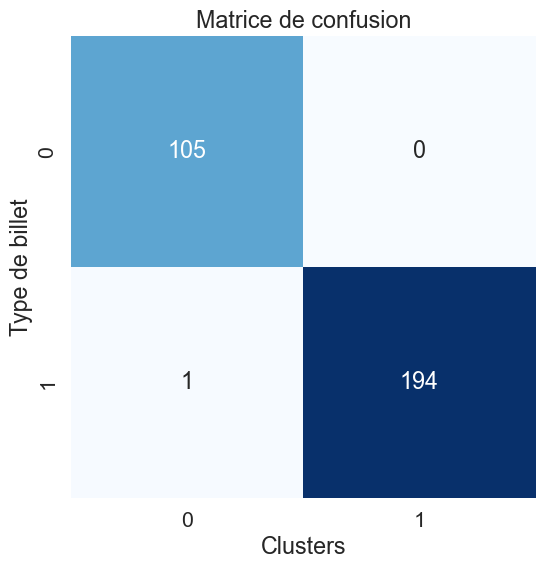

In [925]:
conf_matrix = pd.crosstab(y_test,y_pred_log)

# Representation graphique de notre matrice de confusion
sns.set(rc={'figure.figsize': (6, 6)}, font_scale=1.4)
sns.heatmap(conf_matrix, annot = True, fmt='', cmap='Blues', cbar=False)

plt.title('Matrice de confusion')
plt.xlabel('Clusters')
plt.ylabel('Type de billet')
plt.show()

- Vrais positifs : 194
- Vrais négatifs :105
- Faux positifs :0
- Faux négatifs :1

- Donc nous avons 105 vrais billets détectés comme des faux, et 0 faux billets détectés comme des vrais billets.

#####  <font color='blue light'> 3.5.2 Courbe ROC(AUC-ROC)
- **Mesure la performance globale d'un modèle de classification pour distinguer entre les classes positives et négatives**

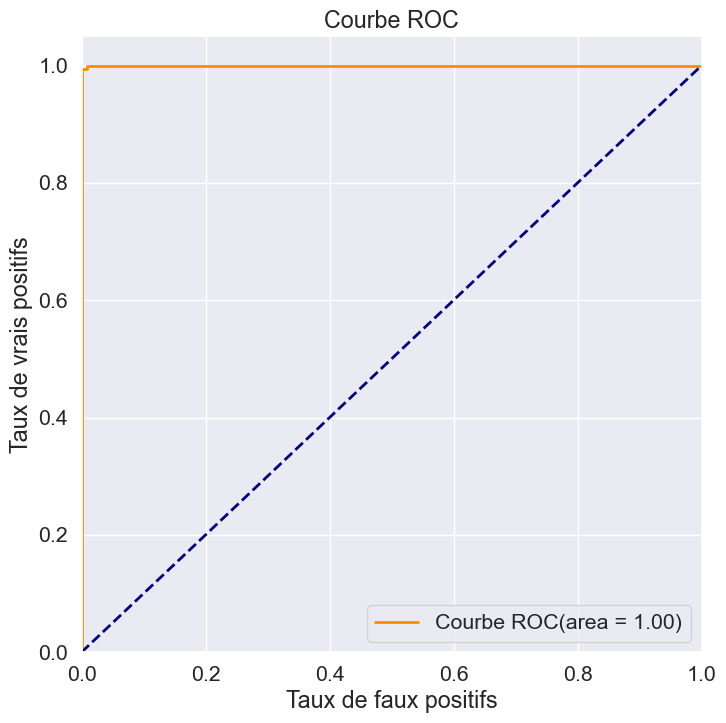

In [926]:
from sklearn.metrics import roc_curve, auc

# Calcul des scores de probabilité
y_pred_log_score = rl_model.predict_proba(x_test)[:, 1]

# Calcul de la courbe ROC
fpr2, tpr2, _ =roc_curve(y_test,y_pred_log_score)
roc_auc2 = auc(fpr2, tpr2)

plt.figure(figsize = (8, 8))

plt.plot(fpr2, tpr2, color = "darkorange", lw=2, label = "Courbe ROC(area = %0.2f)" % roc_auc2)
plt.plot([0, 1], [0, 1], color = "navy", lw=2, linestyle = "--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("Taux de faux positifs")
plt.ylabel("Taux de vrais positifs")
plt.title("Courbe ROC")
plt.legend(loc = "lower right")

plt.show()

- **La zone sous la courbe (AUC : Area Under the Curve) est une mesure de la performance du modèle. Une AUC de 1.0 indique une performance parfaite, où le modèle a un taux de vrais positifs de 1 et un taux de faux positifs de 0.**
- **Dans notre cas, la valeur A.U.C est de 1 , ce qui confirme que le modèle a une excellente capacité à distinguer les billets authentiques des faux.**

- **Evaluation du modèle avec les scores**

#####  <font color='blue light'> 3.5.3 Score F1:"La moyenne harmonique de la précision et du rappel"

In [927]:
from sklearn.metrics import f1_score
f1_log =f1_score(y_test,y_pred_log)
f1_log.round(4)

0.9974

##### F1_score=0.9974, ce qui indique une excellente combinaison de précision et de rappel=modèle très performant

#####  <font color='blue light'> 3.5.4 Accuracy/Precision/Recall

In [928]:
# Calculons nos scores de performance :
    
rl_accuracy = accuracy_score(y_test,y_pred_log).round(4)
print("Accuracy :",rl_accuracy)

rl_precision = precision_score(y_test,y_pred_log).round(4)
print("Precision :",rl_precision)

rl_recall = recall_score(y_test,y_pred_log).round(4)
print("Recall :",rl_recall)

Accuracy : 0.9967
Precision : 1.0
Recall : 0.9949


##### Notre modèle présente une performance  de 98% (taux de prédiction correcte sur toutes les données de test)

#####  <font color='blue light'> 3.5.5 Validation croisée(Regression logistique)

In [929]:
folds = 5

# Effectuer la "prédiction" de validation croisée
cv_pred = cross_val_predict(rl_model, X, y, cv=folds)

# Calcul des métriques
accuracy = accuracy_score(y, cv_pred)
precision = precision_score(y, cv_pred, average='binary') # ou 'macro' si multiclass
recall = recall_score(y, cv_pred, average='binary') # ou 'macro' si multiclass
conf_matrix = confusion_matrix(y, cv_pred)

# Afficher les résultats
print("Cross-Validated Predictions:")
print(cv_pred)
print("Accuracy :", accuracy)
print("Precision :", precision)
print("Recall :", recall)
print("Confusion Matrix:\n", conf_matrix)

Cross-Validated Predictions:
[0 1 1 ... 0 0 0]
Accuracy : 0.99
Precision : 0.9900497512437811
Recall : 0.995
Confusion Matrix:
 [[490  10]
 [  5 995]]


#####  <font color='blue light'> 3.5.6 Matrice de confusion sur l'ensemble des données

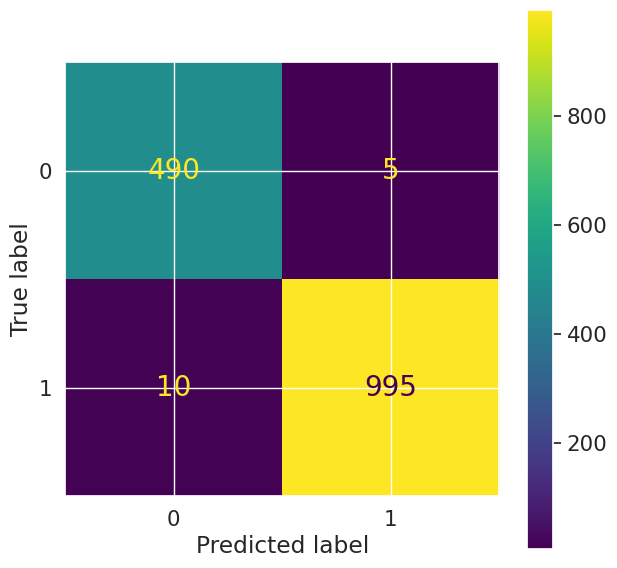

In [930]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Affichage de la matrice de confusion
font = {'family': 'normal', 'size': 20}
plt.rc('font', **font)

cm = confusion_matrix(cv_pred,y)
cmp = ConfusionMatrixDisplay(cm)
figure, ax = plt.subplots(figsize=(7, 7))
cmp.plot(ax=ax)
plt.show()

### <a name="C35"> 4. Méthode du K-NN ( le plus proche voisin)</a> 

- **Le k-NN est un algorithme qui peut servir autant pour la classification que pour la régression. Il est surnommé « nearest neighbors » (plus proches voisins, en français) car le principe de ce modèle consiste en effet à choisir les k données les plus proches du point étudié afin d’en prédire sa valeur.**

- **Le k-NN est un algorithme qui n’utilise pas de modèle statistique. Il est "non paramétrique" et il se base uniquement sur les données d’entraînement.**

- **Le nombre k (nombre de voisins) est l'hyperparamètre que l’on va chercher à optimiser pour minimiser l’erreur sur les données test**

#### <a name="C36"> 4.1 Préparation des données </a> 

In [931]:
# Séparons nos données en un groupe d'entrainement et un groupe de test. 
x_train, x_test,y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state=5)

#### <a name="C37"> 4.2 Choisir le nombre optimal de K</a> 

- **identifier le nombre optimal de voisins k en testant une plage de valeurs possibles pour k de 2 à 15 et en sélectionnant celle qui donne le taux d'erreur le plus faible sur l'ensemble de test
et afficher la performance en fonction de k**

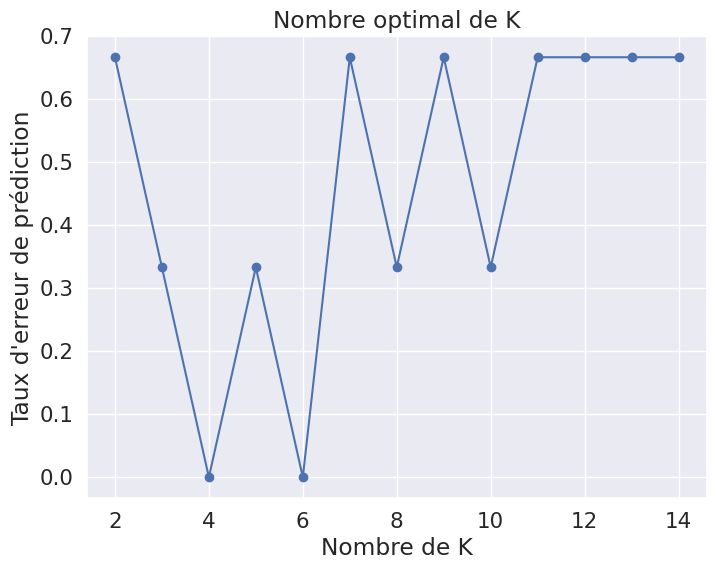

In [932]:
from sklearn import neighbors

errors = []
for k in range(2,15):
    knn = neighbors.KNeighborsClassifier(n_neighbors=k)
    errors.append(100*(1 - knn.fit(x_train, y_train).score(x_test, y_test)))
plt.figure(figsize=(8, 6))
plt.plot(range(2,15), errors, 'o-')
plt.title('Nombre optimal de K')
plt.ylabel("Taux d'erreur de prédiction")
plt.xlabel('Nombre de K')
plt.show()
plt.show()

 ###### D'après ce graphique, K=6 semble être le nombre optimal de voisins car c'est à ce point que le taux d'erreur est le plus bas, ce qui le rend optimal pour ce modèle .

#### <a name="C38"> 4.3 Création du modèle de KNN</a>

In [933]:
# Initialisation et entraînement du modèle
knn_model = KNeighborsClassifier(6)
knn_model.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=6)

#### <a name="C39"> 4.4 Prédictions</a>

In [934]:
# Prédiction sur l'ensemble de test
y_pred_knn = knn_model.predict(x_test)

#### <a name="C40"> 4.5 Vérifications de la qualité du modèle</a>

#####  <font color='blue light'> 4.5.1 Matrice de confusion (K-NN)

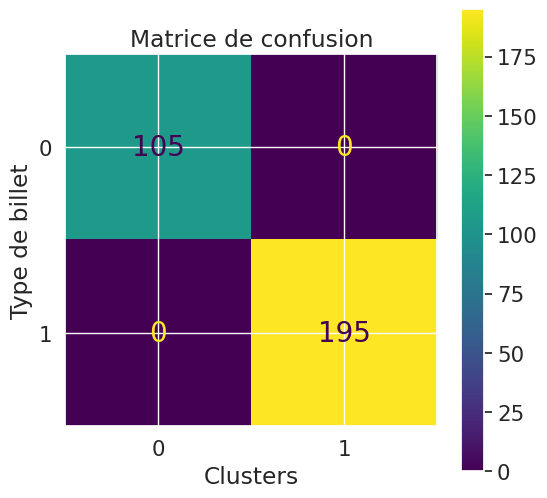

In [935]:
# On réalise notre matrice de confusion
cf = confusion_matrix(y_test,y_pred_knn)
cm = ConfusionMatrixDisplay(cf)

cm.plot()
plt.title('Matrice de confusion')
plt.xlabel('Clusters')
plt.ylabel('Type de billet')
plt.show()

- Vrais positifs : 195
- Vrais négatifs :105
- Faux positifs : 0
- Faux négatifs : 0

- Donc tous les billets ont été correctement classés. Il n'y a aucun faux billet détecté comme un vrai billet et aucun vrai billet détecté comme un faux billet.

#####  <font color='blue light'> 4.5.2 Courbe ROC(AUC-ROC)

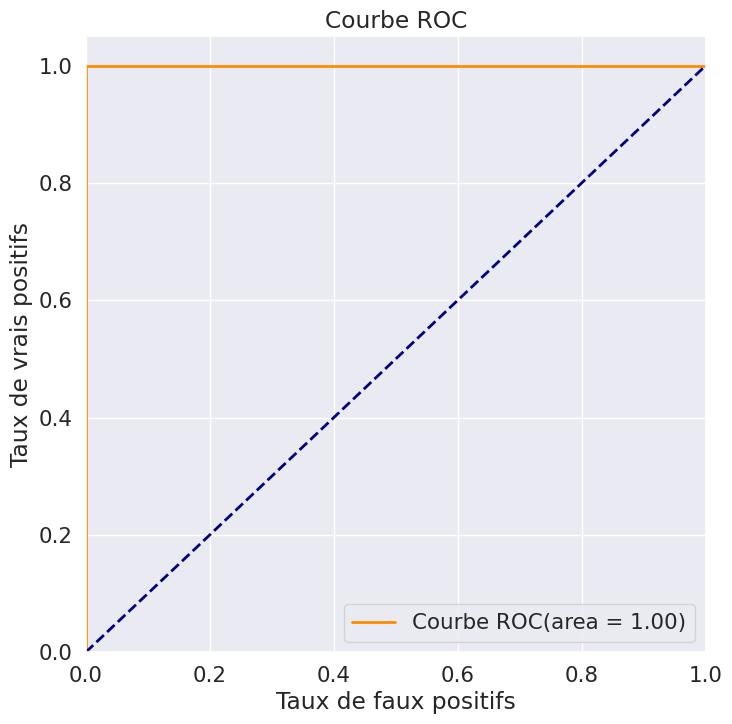

In [936]:
from sklearn.metrics import roc_curve, auc

# Calcul des scores de probabilité
y_pred_knn_score = knn_model.predict_proba(x_test)[:, 1]

# Calcul de la courbe ROC
fpr2, tpr2, _ =roc_curve(y_test,y_pred_knn_score)
roc_auc2 = auc(fpr2, tpr2)

plt.figure(figsize = (8, 8))

plt.plot(fpr2, tpr2, color = "darkorange", lw=2, label = "Courbe ROC(area = %0.2f)" % roc_auc2)
plt.plot([0, 1], [0, 1], color = "navy", lw=2, linestyle = "--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("Taux de faux positifs")
plt.ylabel("Taux de vrais positifs")
plt.title("Courbe ROC")
plt.legend(loc = "lower right")

plt.show()

- **Dans notre cas, la valeur A.U.C est de 1 , ce qui confirme que le modèle a une excellente capacité à distinguer les billets authentiques des faux.**

- **Evaluation du modèle avec les scores**

#####  <font color='blue light'> 4.5.3 Score F1

In [937]:
f1_knn =f1_score(y_test,y_pred_knn)
f1_knn.round(4)

1.0

##### f1_score=1, ce qui indique une excellente combinaison de précision et de rappel=modèle très performant

#####  <font color='blue light'> 4.5.4 Accuracy/Precision/Recall

In [938]:
# Calculons nos scores de performance :
    
knn_accuracy = accuracy_score(y_test,y_pred_knn).round(4)
print("Accuracy :",knn_accuracy)

knn_precision = precision_score(y_test,y_pred_knn).round(4)
print("Precision :",knn_precision)

knn_recall = recall_score(y_test,y_pred_knn).round(4)
print("Recall :",knn_recall)

Accuracy : 1.0
Precision : 1.0
Recall : 1.0


##### Notre modèle présente une performance  de 100% (taux de prédiction correcte sur toutes les données de test)

#####  <font color='blue light'> 4.5.5 Validation croisée(K-NN)

In [939]:
# Effectuer la "prédiction" de validation croisée
cv_pred_knn = cross_val_predict(knn_model, X, y, cv=folds)

# Calcul des métriques
accuracy = accuracy_score(y, cv_pred_knn)
precision = precision_score(y, cv_pred_knn, average='binary')
recall = recall_score(y, cv_pred_knn, average='binary') 
conf_matrix = confusion_matrix(y, cv_pred_knn)

# Afficher les résultats
print("Cross-Validated Predictions:")
print(cv_pred)
print("Accuracy :", accuracy)
print("Precision :", precision)
print("Recall :", recall)
print("Confusion Matrix:\n", conf_matrix)

Cross-Validated Predictions:
[0 1 1 ... 0 0 0]
Accuracy : 0.9906666666666667
Precision : 0.9900596421471173
Recall : 0.996
Confusion Matrix:
 [[490  10]
 [  4 996]]


#####  <font color='blue light'> 4.5.6 Matrice de confusion sur l'ensemble des données

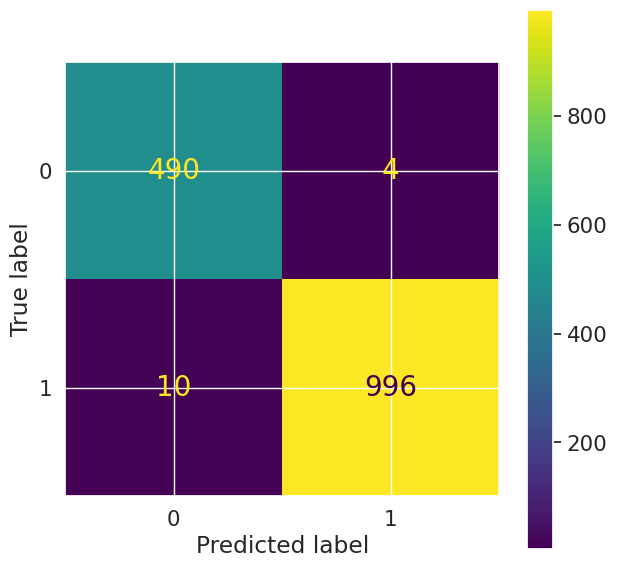

In [940]:
# Affichage de la matrice de confusion
font = {'family': 'normal', 'size': 20}
plt.rc('font', **font)

cm = confusion_matrix(cv_pred_knn,y)
cmp = ConfusionMatrixDisplay(cm)
figure, ax = plt.subplots(figsize=(7, 7))
cmp.plot(ax=ax)
plt.show()

### <a name="C41"> 5. Méthode de Randomforest</a> 

- **La méthode Random Forest est une technique de machine learning qui combine plusieurs arbres de décision pour améliorer la précision des prévisions. Plus précisément, la méthode Random Forest crée un grand nombre d'arbres de décision, chacun étant construit sur un échantillon aléatoire de données d'entraînement et un sous-ensemble aléatoire de variables explicatives. Chaque arbre donne une prédiction et le résultat final est obtenu en combinant les prédictions de tous les arbres.**

#### <a name="C42"> 5.1 Préparation des données</a>

In [941]:
# Séparons nos données en un groupe d'entrainement et un groupe de test. 
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=5)

#### <a name="C43"> 5.2 Création du modèle de Randomforest</a>

In [942]:
# Initialisation et entraînement du modèle
rf_model= RandomForestClassifier(random_state=5)
rf_model.fit(x_train, y_train)

RandomForestClassifier(random_state=5)

#### <a name="C44">5.3 Prédictions</a>

In [943]:
# Prédiction sur l'ensemble de test
y_pred_rf = rf_model.predict(x_test)

#### <a name="C45">5.4 Vérifications de la qualité du modèle</a>

#####  <font color='blue light'> 5.4.1 Matrice de confusion (Randomforest)

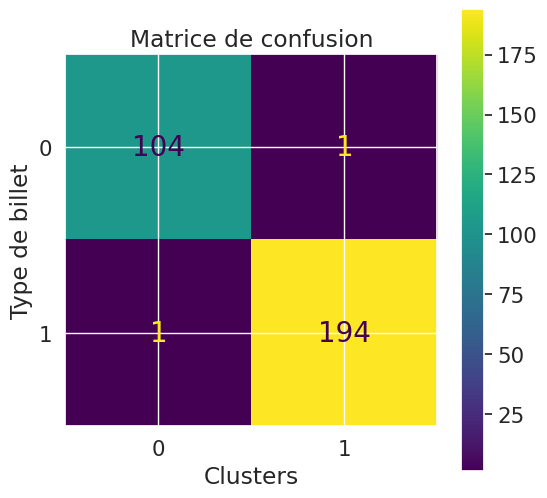

In [944]:
# On réalise notre matrice de confusion
cf = confusion_matrix(y_test,y_pred_rf)
cm = ConfusionMatrixDisplay(cf)

cm.plot()
plt.title('Matrice de confusion')
plt.xlabel('Clusters')
plt.ylabel('Type de billet')
plt.show()

- Vrais positifs : 194
- Vrais négatifs :104
- Faux positifs : 1
- Faux négatifs : 1
- Donc, nous avons 104 vrais billets détectés comme faux billets et 1 faux billet détecté comme un vrai

#####  <font color='blue light'> 5.4.2 Courbe ROC(AUC-ROC)

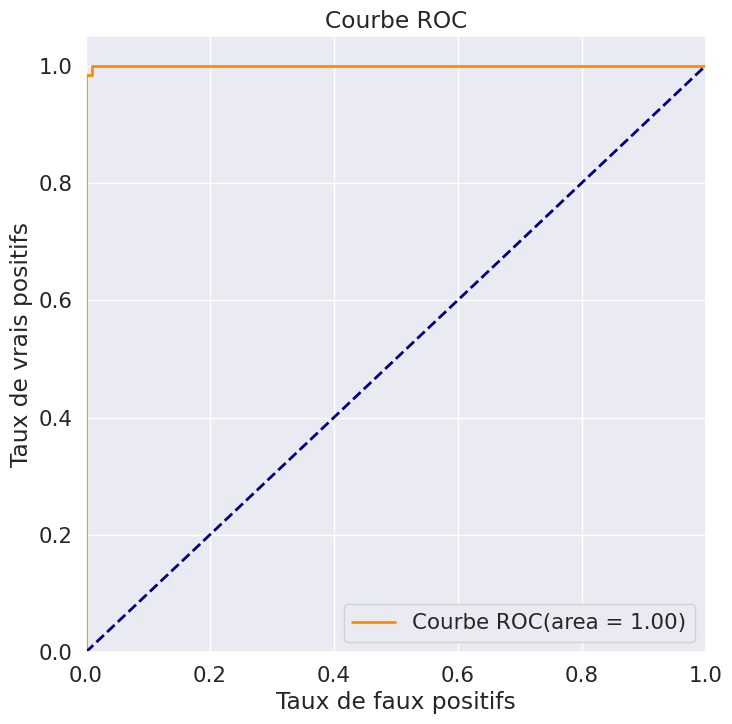

In [945]:
from sklearn.metrics import roc_curve, auc

# Calcul des scores de probabilité
y_pred_rf_score = rf_model.predict_proba(x_test)[:, 1]

# Calcul de la courbe ROC
fpr2, tpr2, _ =roc_curve(y_test,y_pred_rf_score)
roc_auc2 = auc(fpr2, tpr2)

plt.figure(figsize = (8, 8))

plt.plot(fpr2, tpr2, color = "darkorange", lw=2, label = "Courbe ROC(area = %0.2f)" % roc_auc2)
plt.plot([0, 1], [0, 1], color = "navy", lw=2, linestyle = "--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("Taux de faux positifs")
plt.ylabel("Taux de vrais positifs")
plt.title("Courbe ROC")
plt.legend(loc = "lower right")

plt.show()

- **Dans notre cas, la valeur A.U.C est de 1 , ce qui confirme que le modèle a une excellente capacité à distinguer les billets authentiques des faux.**

- **Evaluation du modèle avec les scores**

#####  <font color='blue light'> 5.4.3 Score F1

In [946]:
f1_rf =f1_score(y_test,y_pred_rf)
f1_rf.round(4)

0.9949

##### f1_score=0.9949, ce qui indique une excellente combinaison de précision et de rappel=modèle très performant

#####  <font color='blue light'> 5.4.4 Accuracy/Precision/Recall

In [947]:
# Calculons nos scores de performance :
    
rf_accuracy = accuracy_score(y_test,y_pred_rf).round(4)
print("Accuracy :",rf_accuracy)

rf_precision = precision_score(y_test,y_pred_rf).round(4)
print("Precision :",rf_precision)

rf_recall = recall_score(y_test,y_pred_rf).round(4)
print("Recall :",rf_recall)

Accuracy : 0.9933
Precision : 0.9949
Recall : 0.9949


##### Notre modèle présente une performance  de 99% (taux de prédiction correcte sur toutes les données de test)

#####  <font color='blue light'> Validation croisée(Randomforest)

In [948]:
# Effectuer la "prédiction" de validation croisée
cv_pred_rf = cross_val_predict(rf_model, X, y, cv=folds)

# Calcul des métriques
accuracy = accuracy_score(y, cv_pred_rf)
precision = precision_score(y, cv_pred_rf, average='binary')
recall = recall_score(y, cv_pred_rf, average='binary') 
conf_matrix = confusion_matrix(y, cv_pred_rf)

# Afficher les résultats
print("Cross-Validated Predictions:")
print(cv_pred)
print("Accuracy :", accuracy)
print("Precision :", precision)
print("Recall :", recall)
print("Confusion Matrix:\n", conf_matrix)

Cross-Validated Predictions:
[0 1 1 ... 0 0 0]
Accuracy : 0.992
Precision : 0.9910536779324056
Recall : 0.997
Confusion Matrix:
 [[491   9]
 [  3 997]]


#####  <font color='blue light'> 5.4.6 Matrice de confusion sur l'ensemble des données

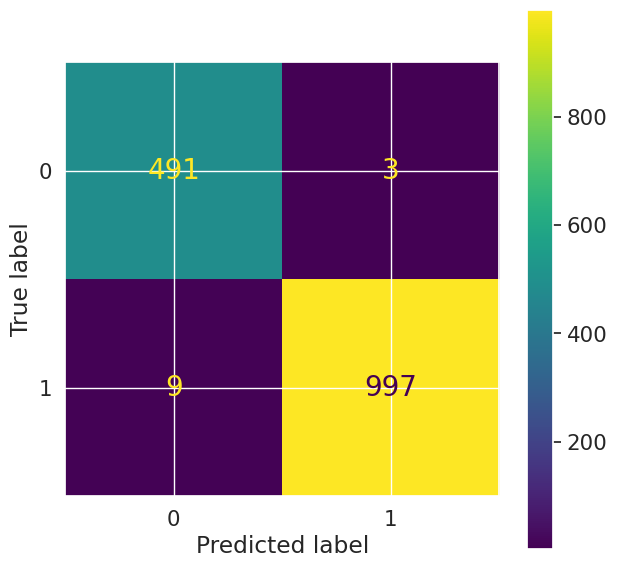

In [949]:
# Affichage de la matrice de confusion
font = {'family': 'normal', 'size': 20}
plt.rc('font', **font)

cm = confusion_matrix(cv_pred_rf,y)
cmp = ConfusionMatrixDisplay(cm)
figure, ax = plt.subplots(figsize=(7, 7))
cmp.plot(ax=ax)
plt.show()

### <a name="C46"> 6. Comparaison des performances des modèles</a> 

In [950]:
#Nous allons maintenant comparer les scores de performance des modèles testés.

cols = ['kmeans','Regression_Logistique','kNN','Randomforest']
index = ['Accuracy','Precision','Rappel']

performance_modele = pd.DataFrame(index = index, columns = cols)

performance_modele['kmeans'] = [kmeans_accuracy,kmeans_precision,kmeans_recall]
performance_modele['Regression_Logistique'] = [rl_accuracy,rl_precision,rl_recall]
performance_modele['kNN'] = [knn_accuracy,knn_precision,knn_recall]
performance_modele['Randomforest'] = [rf_accuracy,rf_precision,rf_recall]


performance_modele

,kmeans,Regression_Logistique,kNN,Randomforest
Accuracy,0.9847,0.9967,1.0,0.9933
Precision,0.9870,1.0000,1.0,0.9949
Rappel,0.9900,0.9949,1.0,0.9949


In [951]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import accuracy_score, precision_score, recall_score

# Liste des modèles
modeles = {
    "Regression_Logistique": rl_model,
    "kNN": knn_model,
    "Randomforest": rf_model
    # kmeans n'est généralement pas utilisé pour la classification, donc il a été omis ici
}

# Stocker les scores de validation croisée pour chaque modèle et chaque métrique
cv_scores = {nom: {} for nom in modeles}

for nom, modele in modeles.items():
    # Obtenir des prédictions croisées
    y_pred = cross_val_predict(modele, X, y, cv=5)
    
    # Calculer et stocker les métriques pour chaque modèle
    cv_scores[nom]['Accuracy'] = accuracy_score(y, y_pred)
    cv_scores[nom]['Precision'] = precision_score(y, y_pred, average='weighted')
    cv_scores[nom]['Recall'] = recall_score(y, y_pred, average='weighted')

# Convertir les scores en DataFrame pour faciliter l'affichage
performance_modele = pd.DataFrame(cv_scores)

# Afficher le DataFrame
print(performance_modele)

           Regression_Logistique       kNN  Randomforest
Accuracy                0.990000  0.990667      0.992000
Precision               0.989999  0.990674      0.992011
Recall                  0.990000  0.990667      0.992000


##### Après avoir testé les 4 modèles, il apparait que le modèle de "régression logistique" et le modèle de "Randomforest" ont le score le plus élevé et donc sont plus adaptés pour faire de la prediction.

##### Pour notre programme de détection, je décide de choisir le modèle de régression logistique; en effet, un modèle utilisant cette méthode sera plus rapide dans le traitement d'un grand nombre de données qu'un modèle du type Randomforest.

### <a name="C47">7. Fichier à tester </a>

##### Pour l'application finale, j'ai choisi la régression logistique. Il s'agit maintenant de tester ce modèle sur de nouvelles données.

In [952]:
def detection_faux_billets(csv_file, model):
    """
    Cette fonction prend en entrée un fichier CSV et un modèle de régression logistique entraîné, 
    et renvoie un DataFrame avec des prédictions d'authenticité pour chaque billet dans le fichier CSV.

    Paramètres :
    csv_file (str) : Le chemin vers le fichier CSV. Le fichier CSV doit contenir une colonne 'id' 
                     et des colonnes pour chaque variable indépendante.
    model : Un modèle de Machine Learning entraîné.

    Retourne :
    df (DataFrame) : Un DataFrame contenant les données originales du fichier CSV, ainsi qu'une 
                     colonne 'Authenticite' avec des prédictions d'authenticité pour chaque billet 
                     ('Vrai' pour authentique, 'Faux' pour non authentique), et une colonne 
                     'Probabilite_authenticite' avec la probabilité associée à chaque prédiction.
    """
    # Lire le fichier CSV
    df = pd.read_csv(csv_file)
    
    # Mettre 'id' en index
    df.set_index('id', inplace=True)
    
    # Sélectionner uniquement les caractéristiques sur lesquelles le modèle a été formé
    features = ["height_left", "height_right", "margin_low", "margin_up", "length"]
    X = df[features]
    
    
    # Faire des prédictions
    y_pred = model.predict(X)

    # Calculer les probabilités
    probabilites = model.predict_proba(X)

    # Convertir les prédictions en "vrai" ou "faux"(Mise à jour du dataframe)
    y_pred = ['Vrai' if pred == 1 else 'Faux' for pred in y_pred]

    # Ajouter les prédictions et les probabilités au DataFrame
    df['Authenticite'] = y_pred
    df['Probabilite_authenticite'] = probabilites[:, 1]

    return df

In [953]:
detection_faux_billets('billets_production(1).csv',rl_model)

,diagonal,height_left,height_right,margin_low,margin_up,length,Authenticite,Probabilite_authenticite
id,,,,,,,,
A_1,171.76,104.01,103.54,5.21,3.30,111.42,Faux,0.002983
A_2,171.87,104.17,104.13,6.00,3.31,112.09,Faux,0.000777
A_3,172.00,104.58,104.29,4.99,3.39,111.57,Faux,0.001405
A_4,172.49,104.55,104.34,4.44,3.03,113.20,Vrai,0.946759
A_5,171.65,103.63,103.56,3.77,3.16,113.33,Vrai,0.999508
